In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from scipy.sparse import hstack 
import nltk
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from nltk.stem import WordNetLemmatizer
import gensim
import re
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models import CoherenceModel
from nltk import pos_tag
from gensim.models import LdaModel
from operator import itemgetter
import nlpaug.augmenter.word as naw
from tensorflow.keras.layers import Embedding,LSTM, Dense, Bidirectional, GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras import utils

ModuleNotFoundError: No module named 'vaderSentiment'

data preprocessing 

In [2]:
df = pd.read_csv('train_data.csv')
df.sample(10)

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
1573,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-16T00:00:00.000Z,"Once I understand how to use this, it will be ...",Gearfit2,Positive
1578,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-07-19T00:00:00.000Z,Added screen a great features visual effect a ...,Gift to client,Positive
2714,Amazon 9W PowerFast Official OEM USB Charger a...,Amazon,"Computers & Accessories,Tablet & E-Reader Acce...",Electronics,2017-05-21T00:00:00.000Z,I was looking everywhere for this because I lo...,awesome,Positive
2439,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-09-20T00:00:00.000Z,"This thing is awesome, great speakers on it to...",Buy one now,Positive
3585,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,It is awesome play pokemon and clash use silk ...,Great tablet,Positive
2174,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-11-05T00:00:00.000Z,Great price of 89 dollars on a great tablet. I...,Great tablet at a great price!,Positive
1575,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-14T00:00:00.000Z,Great tablet for under $100. HD quality and it...,Awesome tablet,Positive
3061,"Kindle E-reader - White, 6 Glare-Free Touchscr...",Amazon,"Office,eBook Readers,Electronics Features,Walm...","Office Supplies,Electronics",2016-09-11T00:00:00.000Z,If you really want to have a good read on some...,Good price excellent reader,Positive
188,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-02-17T00:00:00.000Z,Very competitive Price - Unit works well we li...,For wife - likes it,Positive
3978,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Very impress with the echo show and all of its...,Love it,Positive


In [9]:
df_test = pd.read_csv('test_data_hidden.csv')
df_test.sample()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
207,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-06-24T00:00:00.000Z,Bought this to carry around for Internet and g...,1st time user,Positive


In [10]:
df_test.describe()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
count,1000,1000,1000,1000,1000,1000,997,1000
unique,23,1,23,4,366,979,796,3
top,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-23T00:00:00.000Z,I bought the white version and have it in the ...,Great tablet,Positive
freq,169,1000,169,676,26,2,22,937


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1000 non-null   object
 1   brand              1000 non-null   object
 2   categories         1000 non-null   object
 3   primaryCategories  1000 non-null   object
 4   reviews.date       1000 non-null   object
 5   reviews.text       1000 non-null   object
 6   reviews.title      997 non-null    object
 7   sentiment          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               4000 non-null   object
 1   brand              4000 non-null   object
 2   categories         4000 non-null   object
 3   primaryCategories  4000 non-null   object
 4   reviews.date       4000 non-null   object
 5   reviews.text       4000 non-null   object
 6   reviews.title      3990 non-null   object
 7   sentiment          4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


In [13]:
df.describe()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
count,4000,4000,4000,4000,4000,4000,3990,4000
unique,23,1,23,4,638,3598,2606,3
top,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-23T00:00:00.000Z,I bought this kindle for my 11yr old granddaug...,Great tablet,Positive
freq,676,4000,628,2600,99,4,100,3749


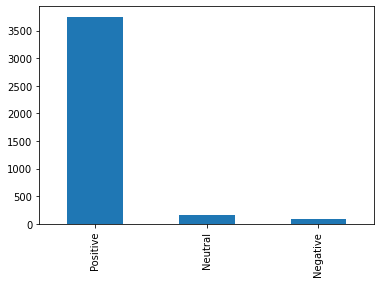

In [14]:
df['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

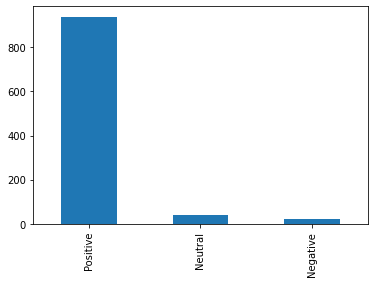

In [15]:
df_test['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

In [16]:
df[df.duplicated()].count()

name                 58
brand                58
categories           58
primaryCategories    58
reviews.date         58
reviews.text         58
reviews.title        58
sentiment            58
dtype: int64

In [17]:
df_test[df_test.duplicated()].count()

name                 3
brand                3
categories           3
primaryCategories    3
reviews.date         3
reviews.text         3
reviews.title        3
sentiment            3
dtype: int64

In [18]:
df_test.drop_duplicates(inplace = True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               997 non-null    object
 1   brand              997 non-null    object
 2   categories         997 non-null    object
 3   primaryCategories  997 non-null    object
 4   reviews.date       997 non-null    object
 5   reviews.text       997 non-null    object
 6   reviews.title      994 non-null    object
 7   sentiment          997 non-null    object
dtypes: object(8)
memory usage: 70.1+ KB


In [19]:
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3942 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               3942 non-null   object
 1   brand              3942 non-null   object
 2   categories         3942 non-null   object
 3   primaryCategories  3942 non-null   object
 4   reviews.date       3942 non-null   object
 5   reviews.text       3942 non-null   object
 6   reviews.title      3932 non-null   object
 7   sentiment          3942 non-null   object
dtypes: object(8)
memory usage: 277.2+ KB


In [20]:
df['brand'].value_counts()

Amazon    3942
Name: brand, dtype: int64

In [21]:
df['categories'].value_counts()

Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           628
Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon Echo Show Smart Assistant - White,Smart Home Automation,E

In [22]:
df['primaryCategories'].value_counts()

Electronics                    2562
Electronics,Hardware           1159
Office Supplies,Electronics     204
Electronics,Media                17
Name: primaryCategories, dtype: int64

In [23]:
df['reviews.date']

0       2016-12-26T00:00:00.000Z
1       2018-01-17T00:00:00.000Z
2       2017-12-20T00:00:00.000Z
3       2017-08-04T00:00:00.000Z
4       2017-01-23T00:00:00.000Z
                  ...           
3995    2017-12-08T00:00:00.000Z
3996    2017-03-31T00:00:00.000Z
3997    2017-01-19T00:00:00.000Z
3998    2016-05-27T00:00:00.000Z
3999    2016-12-30T00:00:00.000Z
Name: reviews.date, Length: 3942, dtype: object

In [24]:
df['reviews.title']

0                              Powerful tablet
1                     Amazon Echo Plus AWESOME
2                                      Average
3                                  Greattttttt
4                                Very durable!
                         ...                  
3995                                   Fun toy
3996                             Great Product
3997                      Great "dumb" speaker
3998    A great 7 inch tablet at a great price
3999                         Gets the job done
Name: reviews.title, Length: 3942, dtype: object

In [25]:
#based on the above i see that some columns will not be needed 
df_updated = df[['reviews.text', 'sentiment']].copy()
df_test_updated = df_test[['reviews.text', 'sentiment']].copy()

In [26]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3942 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviews.text  3942 non-null   object
 1   sentiment     3942 non-null   object
dtypes: object(2)
memory usage: 92.4+ KB


In [27]:
df_test_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviews.text  997 non-null    object
 1   sentiment     997 non-null    object
dtypes: object(2)
memory usage: 23.4+ KB


In [28]:
df_updated.sample(10)

,reviews.text,sentiment
2274,I got this for my daughter's for Christmas thi...,Positive
2936,Love it Love it Love it!!!!!!!!!!!!!!!!!!!!!!!...,Positive
2489,Great beginner tablet for kids I would recomme...,Neutral
187,This device is a good if you are looking for a...,Neutral
290,It is amazing that you can get this much tech ...,Positive
3012,For the price guy cannot beat it great for wat...,Positive
2347,This is my first Amazon Echo and it was a grea...,Positive
113,"Excellent value for my 3 yr old, everything yo...",Positive
3169,I originally purchased a Kindle paperwhite but...,Positive
486,still learning new things about my tablet. ver...,Positive


In [29]:
df_updated['reviews.text'] = df_updated['reviews.text'].apply(str.lower)
df_updated['reviews.text'] = df_updated['reviews.text'].str.replace(r'[^a-zA-Z\s]', ' ',regex=True) 
df_updated.sample(10)

,reviews.text,sentiment
3706,love it it s a lot of fun great speakers t...,Positive
3338,for its price this a great little tablet it ...,Positive
77,both love this tablet and the numerous educati...,Positive
2745,my daughter loves her new tablet plenty of ga...,Positive
2506,i have two of these for my kids ages and ...,Positive
171,the tablet was a good gift for christmas i bo...,Positive
3934,after owning the kids samsung this seems conf...,Negative
1862,got this for the kids for xmas was the best ...,Positive
1444,kind of hard adding smart items but when you d...,Positive
391,someone recommended this to us for the and ...,Positive


In [30]:
df_test_updated['reviews.text'] = df_test_updated['reviews.text'].apply(str.lower)
df_test_updated['reviews.text'] = df_test_updated['reviews.text'].str.replace(r'[^a-zA-Z\s]', ' ',regex=True) 
df_test_updated.sample(10)

,reviews.text,sentiment
240,very happy and satisfiedeasier to handle fast...,Positive
650,very happy with amazon not hesitating to integ...,Positive
587,great notepad huge screen and easily download...,Positive
920,we have always been nexus tablet desciples an...,Positive
421,this is the main reason why i went with amazon...,Positive
857,love the amazon alexa products i have show ...,Positive
293,the original electronic book bought it for my...,Positive
872,they are both responsive to each other and it ...,Positive
880,love this tablet it does everything i need it...,Positive
386,we already had a tablet for our son and it was...,Positive


In [31]:
df_updated.columns = ['text', 'sentiment']
df_test_updated.columns = ['text', 'sentiment']

In [32]:
tweet_tokenizer = TweetTokenizer()

df_updated['text'] = [tweet_tokenizer.tokenize(text) for text in df_updated['text']]
df_updated.sample(10)

,text,sentiment
2775,"[it, would, not, load, my, books, proper, took...",Negative
2253,"[i, bought, this, tablet, for, my, kids, to, w...",Positive
6,"[my, year, old, daughter, saved, up, to, by, t...",Neutral
1612,"[i, love, the, fact, that, i, can, just, use, ...",Positive
292,"[good, product, for, a, young, child, to, play...",Positive
1728,"[everything, was, as, i, expected, and, order,...",Positive
3044,"[purchased, for, my, year, old, mother, as, a,...",Positive
2030,"[not, only, does, it, round, out, my, collecti...",Positive
2553,"[great, tablet, for, reading, and, game, play,...",Positive
3300,"[good, tablet, wife, loves, it, and, would, re...",Positive


In [33]:
df_test_updated['text'] = [tweet_tokenizer.tokenize(text) for text in df_test_updated['text']]
df_updated.sample(10)

,text,sentiment
2961,"[i, had, trouble, linking, to, my, joule, cook...",Positive
659,"[i, bought, my, kindle, about, months, ago, an...",Positive
2920,"[i, have, had, every, kindle, since, the, firs...",Positive
3498,"[i, love, alexa, has, a, pretty, good, speaker...",Positive
106,"[my, year, old, loves, it, good, control, opti...",Positive
2364,"[always, a, big, fan, of, kindle, this, is, my...",Positive
3951,"[i, purchased, it, so, the, weather, and, info...",Positive
334,"[this, tablet, works, great, and, my, daughter...",Positive
3348,"[it, was, ok, you, need, internet, the, sdmini...",Neutral
3652,"[you, will, not, find, another, tablet, like, ...",Positive


In [34]:
lem = WordNetLemmatizer()

df_updated['lemmatize_text'] = [[lem.lemmatize(word) for word in text ] for text in df_updated['text']]
df_updated.sample(10)

,text,sentiment,lemmatize_text
3703,"[great, to, talk, and, see, family, at, anytim...",Positive,"[great, to, talk, and, see, family, at, anytim..."
2980,"[have, been, using, my, kindle, app, on, my, i...",Positive,"[have, been, using, my, kindle, app, on, my, i..."
2342,"[my, year, old, daughter, loves, this, tablet,...",Positive,"[my, year, old, daughter, love, this, tablet, ..."
684,"[i, bought, of, these, to, use, in, a, school,...",Positive,"[i, bought, of, these, to, use, in, a, school,..."
1028,"[this, is, my, first, fire, kindle, i, love, i...",Positive,"[this, is, my, first, fire, kindle, i, love, i..."
1147,"[it, needs, the, internet, to, connect, to, yo...",Positive,"[it, need, the, internet, to, connect, to, you..."
1696,"[i, love, my, kindle, it, fast, great, pict, q...",Positive,"[i, love, my, kindle, it, fast, great, pict, q..."
2951,"[video, quality, is, very, good, works, well, ...",Positive,"[video, quality, is, very, good, work, well, w..."
2964,"[love, this, product, super, easy, to, use, an...",Positive,"[love, this, product, super, easy, to, use, an..."
695,"[looking, at, the, picture, and, seeing, it, w...",Negative,"[looking, at, the, picture, and, seeing, it, w..."


In [35]:
df_test_updated['lemmatize_text'] = [[lem.lemmatize(word) for word in text ] for text in df_test_updated['text']]
df_test_updated.sample(10)

,text,sentiment,lemmatize_text
607,"[i, bought, of, these, for, gifts, i, love, my...",Positive,"[i, bought, of, these, for, gift, i, love, my,..."
628,"[i, bought, two, of, these, for, my, granddaug...",Positive,"[i, bought, two, of, these, for, my, granddaug..."
406,"[bought, it, for, my, son, wife, they, love, i...",Positive,"[bought, it, for, my, son, wife, they, love, i..."
475,"[i, love, my, amazon, fire, hd, it, s, not, to...",Positive,"[i, love, my, amazon, fire, hd, it, s, not, to..."
583,"[i, had, an, alexa, but, thought, the, show, w...",Positive,"[i, had, an, alexa, but, thought, the, show, w..."
169,"[my, nd, fire, great, picture, quality, easy, ...",Positive,"[my, nd, fire, great, picture, quality, easy, ..."
775,"[this, is, a, great, tablet, for, the, price, ...",Positive,"[this, is, a, great, tablet, for, the, price, ..."
581,"[overall, it, is, a, good, tablet, but, i, am,...",Neutral,"[overall, it, is, a, good, tablet, but, i, am,..."
399,"[the, amazon, fire, hd, is, one, of, the, best...",Positive,"[the, amazon, fire, hd, is, one, of, the, best..."
553,"[the, display, is, not, as, sharp, and, vivid,...",Neutral,"[the, display, is, not, a, sharp, and, vivid, ..."


In [36]:
stop_words = stopwords.words('english')

df_updated['lemmatize_text'] = [[word for word in text if word not in stop_words] for text in df_updated['lemmatize_text']]
df_updated.sample(10)

,text,sentiment,lemmatize_text
1705,"[i, am, very, satisfied, with, my, purchase, m...",Positive,"[satisfied, purchase, girlfriend, happy]"
1379,"[bought, it, for, my, son, he, likes, it, very...",Positive,"[bought, son, like, good, alternate, expensive..."
1200,"[this, is, an, amazing, product, for, reading,...",Positive,"[amazing, product, reading, book, watching, mo..."
3326,"[it, is, a, very, good, e, reader, battery, la...",Positive,"[good, e, reader, battery, last, week]"
888,"[my, wife, and, kids, love, it, easy, to, use,...",Positive,"[wife, kid, love, easy, use, great, price]"
2892,"[got, for, my, parents, as, a, gift, simple, t...",Positive,"[got, parent, gift, simple, use, like, got, sa..."
1681,"[i, have, multiple, echo, devices, so, purchas...",Positive,"[multiple, echo, device, purchasing, another, ..."
3601,"[bought, this, for, my, mom, who, is, in, her,...",Positive,"[bought, mom, perfect, easy, use, older, gener..."
3443,"[she, has, dropped, it, a, few, times, and, th...",Positive,"[ha, dropped, time, case, great]"
3834,"[good, products, and, service, and, happy, wit...",Positive,"[good, product, service, happy, amazon, fire, ..."


In [37]:
df_test_updated['lemmatize_text'] = [[word for word in text if word not in stop_words] for text in df_test_updated['lemmatize_text']]
df_test_updated.sample(10)

,text,sentiment,lemmatize_text
594,"[always, a, good, price, and, good, for, what,...",Positive,"[always, good, price, good, meant]"
639,"[bought, this, for, my, daughter, to, use, in,...",Positive,"[bought, daughter, use, school, love, product,..."
530,"[i, have, both, the, kindle, voyage, and, the,...",Positive,"[kindle, voyage, low, end, kindle, fire, fire,..."
518,"[this, device, meets, the, needs, of, my, gran...",Positive,"[device, meet, need, grandson, read, play, gam..."
925,"[this, is, a, great, tablet, for, my, teen, sh...",Positive,"[great, tablet, teen, love, price, beat]"
376,"[once, the, games, are, downloaded, it, was, g...",Positive,"[game, downloaded, wa, great, long, road, trip]"
517,"[the, new, tablet, is, great, nice, upgrades, ...",Positive,"[new, tablet, great, nice, upgrade, love, easy..."
62,"[the, family, and, i, love, alexa, view, and, ...",Positive,"[family, love, alexa, view, got, hooked, every..."
684,"[great, choice, battery, life, outstanding, ma...",Positive,"[great, choice, battery, life, outstanding, ma..."
528,"[great, product, loving, alexa, was, so, happy...",Positive,"[great, product, loving, alexa, wa, happy, kno..."


In [38]:
df_updated['updated_text'] = [' '.join(text) for text in df_updated['lemmatize_text']]
df_updated['text'] = [' '.join(text) for text in df_updated['text']]
df_updated.sample(10)

,text,sentiment,lemmatize_text,updated_text
1421,i haven t used any other kindle before but thi...,Positive,"[used, kindle, kindle, wa, made, job, doe, pro...",used kindle kindle wa made job doe properly sl...
2946,it s so fantastic to just ask a device to turn...,Positive,"[fantastic, ask, device, turn, light, play, mu...",fantastic ask device turn light play music con...
2244,download can be slow at times overall good pro...,Positive,"[download, slow, time, overall, good, product]",download slow time overall good product
3690,this was bought for a gift but it looks nice j...,Positive,"[wa, bought, gift, look, nice, wa, expected]",wa bought gift look nice wa expected
3456,i debated buying the new kindle oasis since i ...,Positive,"[debated, buying, new, kindle, oasis, since, o...",debated buying new kindle oasis since owned ev...
33,this is a great tablet for basic needs interne...,Positive,"[great, tablet, basic, need, internet, video, ...",great tablet basic need internet video streami...
1946,decent little tablet if you are not a game pla...,Neutral,"[decent, little, tablet, game, player, tablet,...",decent little tablet game player tablet shuts ...
622,the amazon fire is an inexpensive wifi device ...,Positive,"[amazon, fire, inexpensive, wifi, device, use,...",amazon fire inexpensive wifi device use answer...
3639,my son uses this tablet for movies and music a...,Positive,"[son, us, tablet, movie, music, surf, internet...",son us tablet movie music surf internet money ...
1015,nice tablet for media consumption for the pric...,Positive,"[nice, tablet, medium, consumption, price, ama...",nice tablet medium consumption price amazon us...


In [39]:
df_test_updated['updated_text'] = [' '.join(text) for text in df_test_updated['lemmatize_text']]
df_test_updated['text'] = [' '.join(text) for text in df_test_updated['text']]
df_test_updated.sample(10)

,text,sentiment,lemmatize_text,updated_text
704,i have an old kindle touch the last one that s...,Positive,"[old, kindle, touch, last, one, still, text, v...",old kindle touch last one still text voice lon...
212,can not tell you the price of merchandise when...,Positive,"[tell, price, merchandise, asked]",tell price merchandise asked
564,had the echo plus over a week and this thing i...,Positive,"[echo, plus, week, thing, amazing, great, soun...",echo plus week thing amazing great sound easy ...
292,i love my smart portable speaker it has games ...,Positive,"[love, smart, portable, speaker, ha, game, wea...",love smart portable speaker ha game weather ne...
89,biting as a gift my only concern was the size ...,Positive,"[biting, gift, concern, wa, size, amazon, inte...",biting gift concern wa size amazon interface w...
23,this is a great tablet for the price i have on...,Positive,"[great, tablet, price, one, purchased, year, a...",great tablet price one purchased year ago use ...
783,i bought this as a backup i am currently using...,Positive,"[bought, backup, currently, using, headphone]",bought backup currently using headphone
410,great sound and amazing options love this grea...,Positive,"[great, sound, amazing, option, love, great, r...",great sound amazing option love great replacem...
956,i got the first version for my sister and she ...,Positive,"[got, first, version, sister, able, put, year,...",got first version sister able put year got one...
977,perfect size for reading watching movies and c...,Positive,"[perfect, size, reading, watching, movie, carr...",perfect size reading watching movie carrying p...


In [40]:
df_updated['review_length'] = [len(review) for review in df_updated['updated_text']]
df_updated.sample(10)

,text,sentiment,lemmatize_text,updated_text,review_length
3324,my kids like it very much the price is low the...,Positive,"[kid, like, much, price, low, tablet, light, w...",kid like much price low tablet light weighted,45
3732,this is my th amazon alexa product i used to h...,Positive,"[th, amazon, alexa, product, used, alexa, echo...",th amazon alexa product used alexa echo moved ...,168
1213,great for keeping around the house and doing b...,Positive,"[great, keeping, around, house, basic, interne...",great keeping around house basic internet func...,207
1169,we purchased the echo show for christmas this ...,Positive,"[purchased, echo, show, christmas, year, love,...",purchased echo show christmas year love much k...,85
2601,we struggled with a surprise christmas gift th...,Positive,"[struggled, surprise, christmas, gift, year, s...",struggled surprise christmas gift year store s...,70
2468,i love this product would really recommend to ...,Positive,"[love, product, would, really, recommend, one]",love product would really recommend one,39
3666,my niece loves this tablet she will not put it...,Positive,"[niece, love, tablet, put]",niece love tablet put,21
191,love how user friendly the kindle fire is for ...,Positive,"[love, user, friendly, kindle, fire, age]",love user friendly kindle fire age,34
1505,i live in a small apartment and this fan kept ...,Positive,"[live, small, apartment, fan, kept, whole, pla...",live small apartment fan kept whole place cool,46
2278,i control all my smart home sthings with it an...,Positive,"[control, smart, home, sthings, also, echo, dot]",control smart home sthings also echo dot,40


In [41]:
df_test_updated['review_length'] = [len(review) for review in df_test_updated['updated_text']]
df_test_updated.sample(10)

,text,sentiment,lemmatize_text,updated_text,review_length
659,it great just a little small then what i would...,Positive,"[great, little, small, would, like]",great little small would like,29
817,perfect start for smart home works perfect wit...,Positive,"[perfect, start, smart, home, work, perfect, e...",perfect start smart home work perfect echo,42
833,we own an ipad samsug tablets and we have both...,Positive,"[ipad, samsug, tablet, love, fire, wave, better]",ipad samsug tablet love fire wave better,40
187,great product i m at the beginning stages of h...,Positive,"[great, product, beginning, stage, smart, home...",great product beginning stage smart home wa pe...,60
181,this replaced my old kindle fire i have not ye...,Positive,"[replaced, old, kindle, fire, yet, explored, f...",replaced old kindle fire yet explored feature ...,98
873,great overall would be nice to have parental c...,Positive,"[great, overall, would, nice, parental, contro...",great overall would nice parental control though,48
254,this is the hub dollar my smart devices and it...,Positive,"[hub, dollar, smart, device, worksthis, hub, d...",hub dollar smart device worksthis hub dollar s...,62
25,i decided to buy this instead of a traditional...,Positive,"[decided, buy, instead, traditional, kindle, r...",decided buy instead traditional kindle regret ...,143
220,i m in love with alexa love her fir music quic...,Positive,"[love, alexa, love, fir, music, quick, weather...",love alexa love fir music quick weather update...,131
631,love the echo show allows me to control lights...,Positive,"[love, echo, show, allows, control, light, ala...",love echo show allows control light alarm vacu...,139


In [42]:
df_updated['sentiment'] = df_updated['sentiment'].map({'Negative': 0, 'Neutral': 1, 'Positive':2})
df_updated.sample(10)

,text,sentiment,lemmatize_text,updated_text,review_length
1304,bought for my yr old grandson and he loves it ...,2,"[bought, yr, old, grandson, love, ha, lot, lea...",bought yr old grandson love ha lot learning nu...,65
291,easy to use purchased for my nephew he s he lo...,2,"[easy, use, purchased, nephew, love]",easy use purchased nephew love,30
3712,i bought this because i recently signed up for...,2,"[bought, recently, signed, amazon, prime, want...",bought recently signed amazon prime wanted tak...,79
3049,my grandkids love it they use it at home and w...,2,"[grandkids, love, use, home, travel]",grandkids love use home travel,30
3680,my daughter loves her tablet i love free time ...,2,"[daughter, love, tablet, love, free, time, lov...",daughter love tablet love free time love case ...,77
2622,my wife loves the tablet she s only using it f...,2,"[wife, love, tablet, using, internet, far, ha,...",wife love tablet using internet far ha worked ...,56
2569,my wife loves it replaces a kindle from like,2,"[wife, love, replaces, kindle, like]",wife love replaces kindle like,30
1468,gets use everyday by my girlfriend who i bough...,2,"[get, use, everyday, girlfriend, bought, compl...",get use everyday girlfriend bought complaint a...,77
622,the amazon fire is an inexpensive wifi device ...,2,"[amazon, fire, inexpensive, wifi, device, use,...",amazon fire inexpensive wifi device use answer...,108
1672,i like the display with news found out a comma...,2,"[like, display, news, found, command, turn, sc...",like display news found command turn screen wa...,141


In [43]:
df_test_updated['sentiment'] = df_test_updated['sentiment'].map({'Negative': 0, 'Neutral': 1, 'Positive':2})
df_test_updated.sample(10)

,text,sentiment,lemmatize_text,updated_text,review_length
470,super easy to setup for the kids to use parent...,2,"[super, easy, setup, kid, use, parental, contr...",super easy setup kid use parental control bonus,47
114,we were interested in the echo line of product...,2,"[interested, echo, line, product, purchased, v...",interested echo line product purchased vivint ...,156
328,great tablet for web access and works well gam...,2,"[great, tablet, web, access, work, well, gamin...",great tablet web access work well gaming reaso...,79
163,easy to use and elegant in design perfect gift...,2,"[easy, use, elegant, design, perfect, gift, kid]",easy use elegant design perfect gift kid,40
565,the kindle fire hd has a larger screen vs and ...,2,"[kindle, fire, hd, ha, larger, screen, v, imag...",kindle fire hd ha larger screen v image crispe...,61
938,my daughter absolutely love her tablet and i l...,2,"[daughter, absolutely, love, tablet, love, kid...",daughter absolutely love tablet love kid friendly,49
726,i thought it would be as big as small paper bu...,1,"[thought, would, big, small, paper, turn, like...",thought would big small paper turn like palm t...,134
428,gift for my grandpa so he can do internet sear...,2,"[gift, grandpa, internet, search, chair, play,...",gift grandpa internet search chair play game l...,73
600,i love my echo show i wish you could watch mov...,2,"[love, echo, show, wish, could, watch, movie, ...",love echo show wish could watch movie tc show ...,69
243,i bought this tablet for my year old grand dau...,2,"[bought, tablet, year, old, grand, daughter, l...",bought tablet year old grand daughter love set...,243


In [44]:
X_train = df_updated[['updated_text']]
y_train = df_updated['sentiment']
X_test = df_test_updated[['updated_text']]
y_test = df_test_updated['sentiment']

In [45]:
text_vect = TfidfVectorizer()
text_vect.fit(X_train['updated_text'])
X_train_transform = text_vect.transform(X_train['updated_text'])
X_test_transform = text_vect.transform(X_test['updated_text'])

- apply ML algorithms without handling class imbalance

In [46]:
def model_training(model, X_train = X_train_transform, y_train = y_train, X_test = X_test_transform):
    model.fit(X_train, y_train)
    return model.predict(X_test)

In [47]:
def model_score(y_pred):
    return [confusion_matrix(y_test, y_pred), classification_report(y_test, y_pred, output_dict = True)]

In [48]:
def test(X_train = X_train_transform, y_train = y_train, X_test = X_test_transform, nb_test = True):
    result = []
    if nb_test:
      result.append(model_score(model_training(MultinomialNB(**nb_params),X_train,y_train,X_test)))

    result.append(model_score(model_training(RandomForestClassifier(**rf_params),X_train,y_train,X_test)))
    result.append(model_score(model_training(XGBClassifier(**XGB_params),X_train,y_train,X_test)))
    result.append(model_score(model_training(svm.SVC(**svc_params),X_train,y_train,X_test)))
    result.append(model_score(model_training(DecisionTreeClassifier(**dt_params),X_train,y_train,X_test)))
    result.append(model_score(model_training(LogisticRegression(**lr),X_train,y_train,X_test)))
    return result

In [49]:
nb_params = {
    'class_prior': [0.9 , 0.70, 0.14]
}

rf_params = {
    'max_depth':20,
     'n_estimators': 500,
     'class_weight': 'balanced'
}
XGB_params = {
    'objective': 'multi:softmax',
    'max_depth': 30,
    'learning_rate': 0.01,
    'verbosity': 0,
    'n_estimators': 1000,
    'early_stopping_round':10,
    'num_class':3,
}

svc_params = {
    'class_weight': 'balanced'
}
dt_params = {
    
}

lr = {
    'solver':'lbfgs',
    'max_iter':50000, 
    'multi_class':'ovr'
}
result = test()

C:\Users\عبدالعزيز\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\عبدالعزيز\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\عبدالعزيز\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.

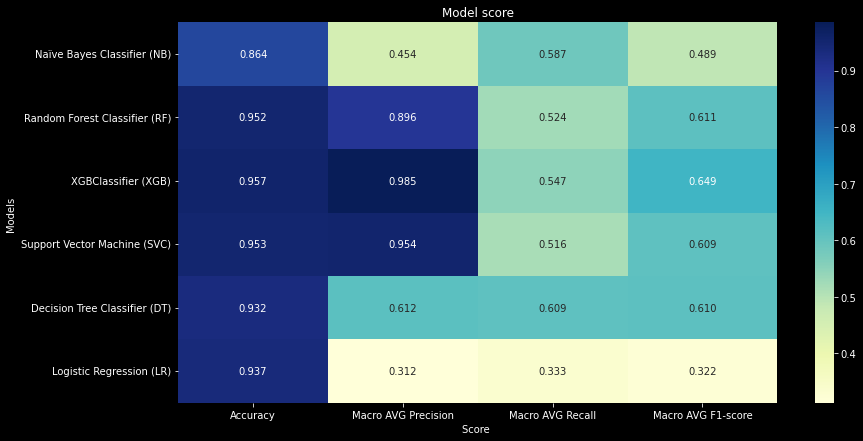

In [50]:
def plot_result():
  evaluation_results = pd.DataFrame(np.zeros((6,4)), columns=['Accuracy', 'Macro AVG Precision','Macro AVG Recall','Macro AVG F1-score'])
  evaluation_results.index=index
  for i in range(len(result)):
    if(len(result) !=5 ):
      evaluation_results.iloc[i]['Accuracy'] = result[i][1]['accuracy']
      evaluation_results.iloc[i]['Macro AVG F1-score'] = result[i][1]['macro avg']['f1-score']  
      evaluation_results.iloc[i]['Macro AVG Precision'] = result[i][1]['macro avg']['precision']
      evaluation_results.iloc[i]['Macro AVG Recall'] = result[i][1]['macro avg']['recall']
    else:
      evaluation_results.iloc[i+1]['Accuracy'] = result[i][1]['accuracy']
      evaluation_results.iloc[i+1]['Macro AVG F1-score'] = result[i][1]['macro avg']['f1-score']  
      evaluation_results.iloc[i+1]['Macro AVG Precision'] = result[i][1]['macro avg']['precision']
      evaluation_results.iloc[i+1]['Macro AVG Recall'] = result[i][1]['macro avg']['recall']
  with plt.style.context('dark_background'):
    plt.figure(figsize=(13.42,7))
    f = sns.heatmap(evaluation_results, cmap='YlGnBu', annot=True, fmt='.3f')
    f.set_title("Model score" , color = "white")
    plt.xlabel("Score " , color = "white")
    plt.ylabel("Models " , color = "white")

index = ['Naïve Bayes Classifier (NB)','Random Forest Classifier (RF)','XGBClassifier (XGB)',
         'Support Vector Machine (SVC)','Decision Tree Classifier (DT)','Logistic Regression (LR)']
plot_result()

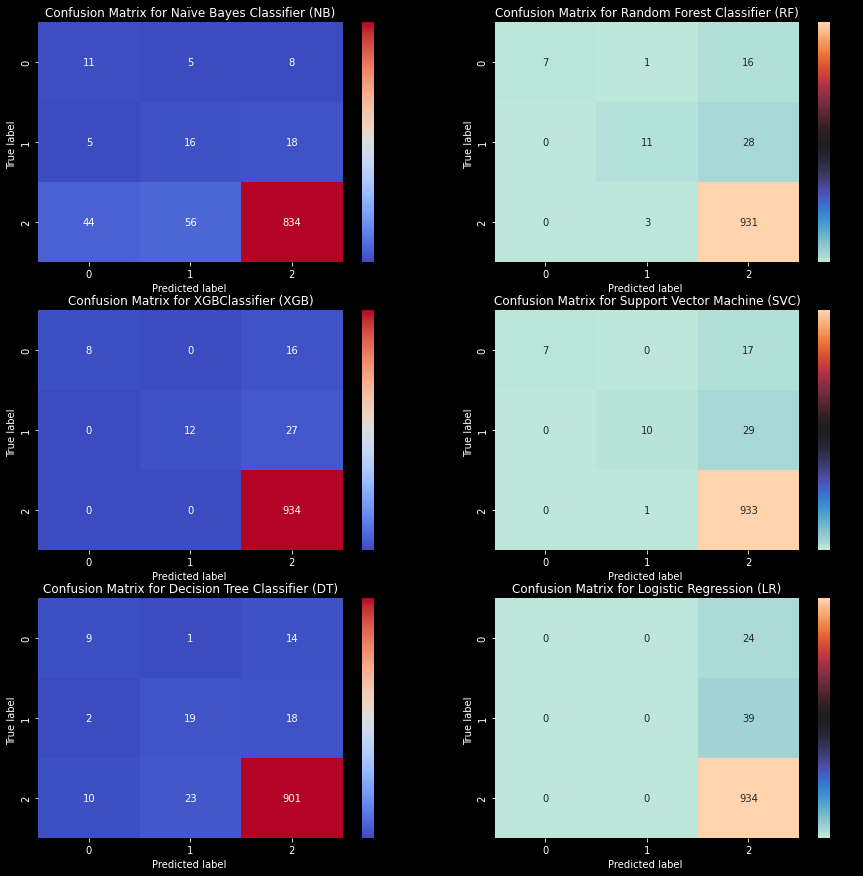

In [51]:
def plot_matrix():
  colors = ['coolwarm', 'icefire']
  size  = len(result)//2
  with plt.style.context('dark_background'):
    fig, axs = plt.subplots(size, 2,figsize=(15,15))
  count = 0
  for i in range(size):
    for j in range(2):
          f = sns.heatmap(result[count][0],cmap= colors[j], annot=True, fmt='d',ax=axs[i][j] , cbar=(i,j))
          axs[i][j].set_title('Confusion Matrix for {}'.format(index[count]) , color = "white")
          axs[i][j].set_xlabel("Predicted label " , color = "white")
          axs[i][j].set_ylabel("True label " , color = "white")
          count+=1
          if(count >len(result)):
            break
  plt.show()
  if(size == 2):
    with plt.style.context('dark_background'):
          plt.figure(figsize=(15/2,15/2))
          f = sns.heatmap(result[4][0],cmap = 'coolwarm', annot=True, fmt='d')
          f.set_title('Confusion Matrix for {}'.format(index[5]) , color = "white")
          plt.xlabel("Predicted label " , color = "white")
          plt.ylabel("True label " , color = "white")
          plt.show()

plot_matrix()

- feature eng add sentiment score 

In [52]:
analyzer = SentimentIntensityAnalyzer()
df_updated['score']= [analyzer.polarity_scores(text)['compound'] for text in df_updated['updated_text']]
df_test_updated['score']= [analyzer.polarity_scores(text)['compound'] for text in df_test_updated['updated_text']]

X_train = df_updated[['updated_text', 'score']]
y_train = df_updated['sentiment']
X_test = df_test_updated[['updated_text', 'score']]
y_test = df_test_updated['sentiment']



In [53]:
text_vect = TfidfVectorizer()
text_vect.fit(X_train['updated_text'])
X_train_transform = text_vect.transform(X_train['updated_text'])
X_test_transform = text_vect.transform(X_test['updated_text'])

X_train_transform_sent_score = hstack([X_train_transform, X_train['score'].values.reshape(-1, 1)])
X_test_transform_sent_score = hstack([X_test_transform, X_test['score'].values.reshape(-1, 1)])

In [54]:
result = test(X_train_transform_sent_score,y_train ,X_test_transform_sent_score, nb_test = False)

C:\Users\عبدالعزيز\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\عبدالعزيز\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\عبدالعزيز\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.

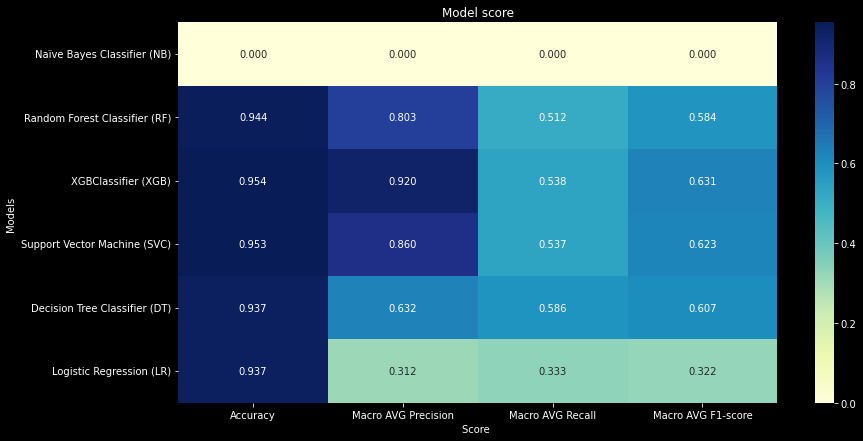

In [55]:
plot_result()

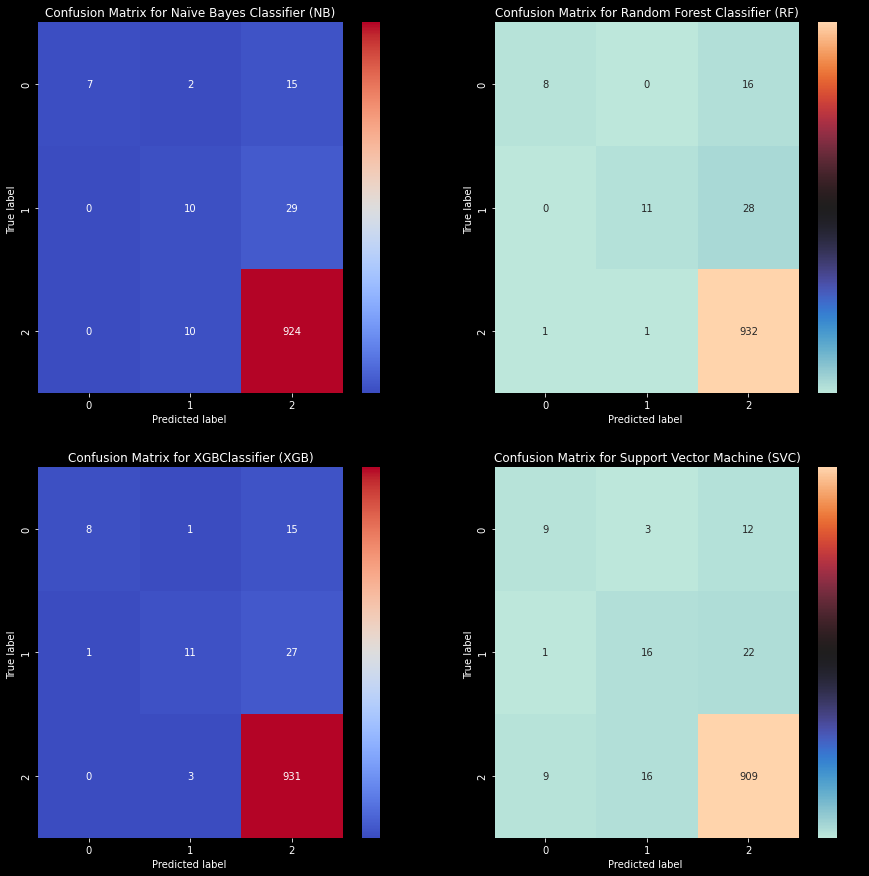

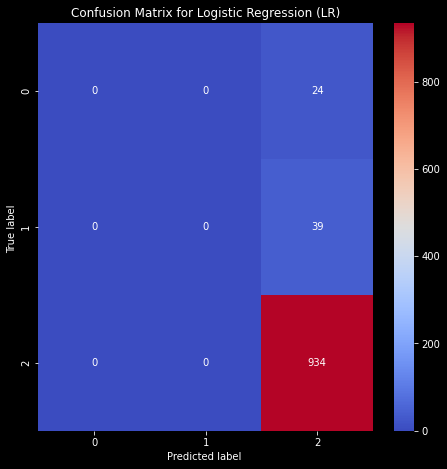

In [56]:
plot_matrix()

- Apply oversampling

In [57]:
ros = RandomOverSampler(random_state=1)

X_res, y_res = ros.fit_resample(X_train_transform, y_train)

In [58]:
result = test(X_res,y_res,X_test_transform)

C:\Users\عبدالعزيز\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


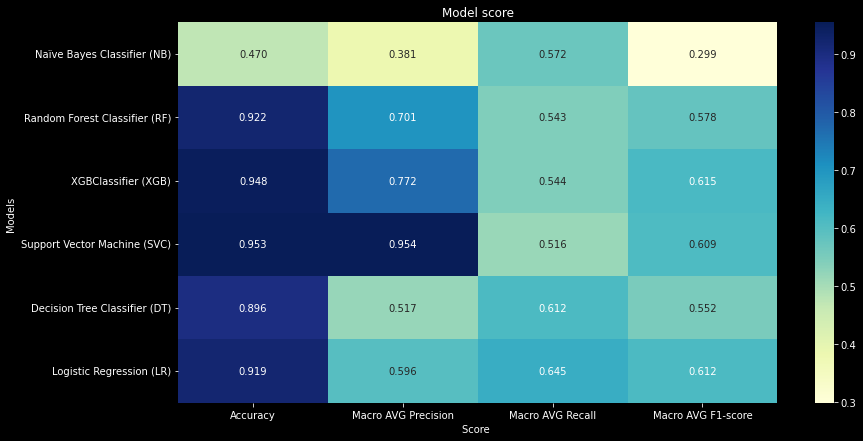

In [59]:
plot_result()

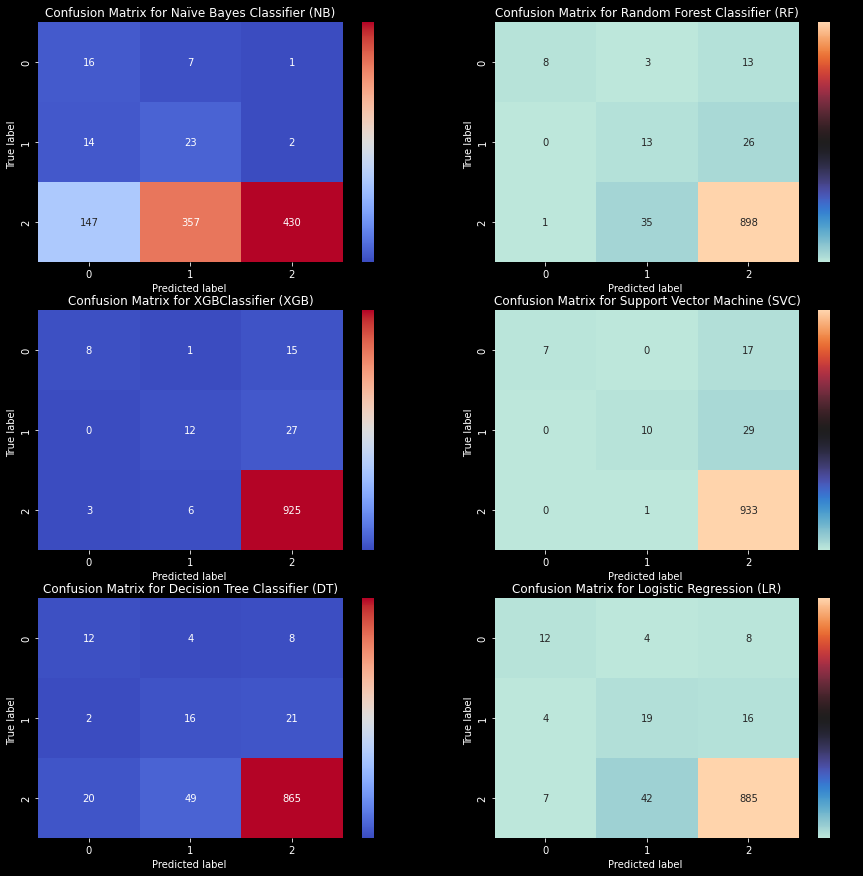

In [60]:
plot_matrix()

In [61]:
text_vect = TfidfVectorizer()
text_vect.fit(X_train['updated_text'])
X_train_transform = text_vect.transform(X_train['updated_text'])
X_test_transform = text_vect.transform(X_test['updated_text'])

In [62]:
oversample = SMOTE()
X_train_transform_smote, y_train_smote = oversample.fit_resample(X_train_transform, y_train)

X_train_transform_smote.shape,y_train_smote.shape

((11082, 4131), (11082,))

In [63]:
nb_params = {
    'class_prior':[0.09,0.1,0.09]
}

dt_params = {
}

result = test(X_train_transform_smote, y_train_smote, X_test_transform)

C:\Users\عبدالعزيز\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


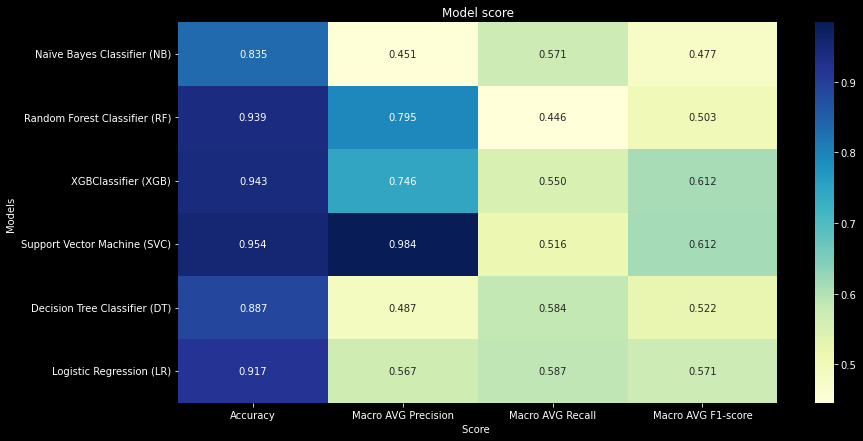

In [64]:
plot_result()

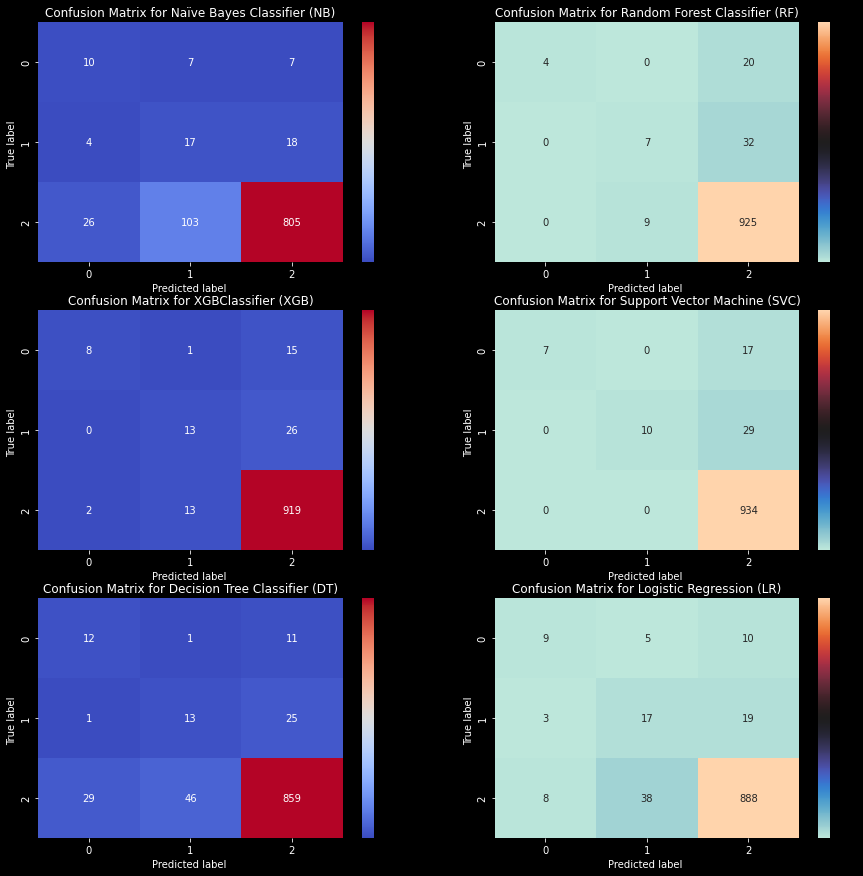

In [65]:
plot_matrix()

- apply text augmentation

In [66]:
X_train = df_updated[['updated_text']]
y_train = df_updated['sentiment']
X_test = df_test_updated[['updated_text']]
y_test = df_test_updated['sentiment']

In [67]:
aug_w2v = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert")

In [68]:
def augment_text(train,samples=1000,target = 0):
    df_n=train[train['sentiment'] == target].reset_index(drop=True)
    new_text = []
    for i in np.random.randint(0,len(df_n),samples):        
        text = df_n.iloc[i]['text']
        augmented_text = aug_w2v.augment(text)
        new_text.append(augmented_text)
    new=pd.DataFrame({'text':new_text,'sentiment':target})
    train = train.append(new).reset_index(drop=True)
    return train

In [69]:
df_test = df_updated[['text', 'sentiment']].copy()
df_test.sample()

,text,sentiment
3932,bought this for my teenage daughter and it wor...,2


In [70]:
df_test = augment_text(df_test,samples=1000 ,target = 1)
df_test = augment_text(df_test,samples=1000 ,target = 0)

In [71]:
df_test['aug_text'] = [tweet_tokenizer.tokenize(text) for text in df_test['text']]
df_test['aug_text'] = [[lem.lemmatize(word) for word in text ] for text in df_test['aug_text']]
df_test['aug_text'] = [[word for word in text if word not in stop_words] for text in df_test['aug_text']]
df_test.sample(10)

,text,sentiment,aug_text
5418,with this solution does not give great easy an...,0,"[solution, doe, give, great, easy, answer, use..."
581,i bought a year ago for our oldest kid came ba...,2,"[bought, year, ago, oldest, kid, came, back, y..."
4627,... i wish it never has included some more of ...,1,"[..., wish, never, ha, included, apps, play, s..."
1435,kind of hard adding smart items but when you d...,2,"[kind, hard, adding, smart, item, nice, talk, ..."
3923,the kindle fire is a wonderful small device to...,2,"[kindle, fire, wonderful, small, device, use, ..."
18,got this model only because of the sale price ...,2,"[got, model, sale, price, built, hub, control,..."
4739,unfortunately we only bought this because we t...,1,"[unfortunately, bought, thought, would, great,..."
3905,i have been transforming my house to a smart h...,2,"[transforming, house, smart, home, far, thus, ..."
2758,i m disappointed sometimes gives doesn t under...,1,"[disappointed, sometimes, give, understand]"
3731,the video screen really adds wonderfully to th...,2,"[video, screen, really, add, wonderfully, func..."


In [72]:
df_test['updated_text'] = [' '.join(text) for text in df_test['aug_text']]
df_test.sample(10)

,text,sentiment,aug_text,updated_text
3824,its pretty good for the price my only concern ...,2,"[pretty, good, price, concern, quality, pictur...",pretty good price concern quality picture hd o...
4242,wish it was just easier to also understand set...,1,"[wish, wa, easier, also, understand, set, chil...",wish wa easier also understand set child accid...
3421,these kindle fire tablets simply can t be beat...,2,"[kindle, fire, tablet, simply, beat, term, val...",kindle fire tablet simply beat term value bang...
3288,my kids like it very much the price is low the...,2,"[kid, like, much, price, low, tablet, light, w...",kid like much price low tablet light weighted
125,this item work just as i expected it to great ...,2,"[item, work, expected, great, product]",item work expected great product
3580,great tablet so affordable and an awesome service,2,"[great, tablet, affordable, awesome, service]",great tablet affordable awesome service
1101,bought this mostly as a backup and to read a f...,0,"[bought, mostly, backup, read, book, since, la...",bought mostly backup read book since larger ce...
1861,between this product and siri alexais much mor...,2,"[product, siri, alexais, much, useful, reliabl...",product siri alexais much useful reliable cont...
30,we are new to connected home equipment i got t...,2,"[new, connected, home, equipment, got, wife, k...",new connected home equipment got wife kitchen ...
485,use it in bathroom to listen to my amazon musi...,2,"[use, bathroom, listen, amazon, music, alexa, ...",use bathroom listen amazon music alexa control...


In [73]:
vect_aug = TfidfVectorizer()
vect_aug.fit(df_test['updated_text'])

TfidfVectorizer()

In [74]:
X_train_aug = df_test['updated_text']
y_train_aug = df_test['sentiment']
X_train_transform_aug = vect_aug.transform(X_train_aug)
X_test_transform_aug = vect_aug.transform(X_test['updated_text'])

In [75]:
rf_params = {
    'max_depth':20,
     'n_estimators': 500,
     'class_weight': 'balanced'
}

nb_params = {
    'class_prior': [0.3,0.315,0.2]
}


result = test(X_train_transform_aug,y_train_aug ,X_test_transform_aug)

C:\Users\عبدالعزيز\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


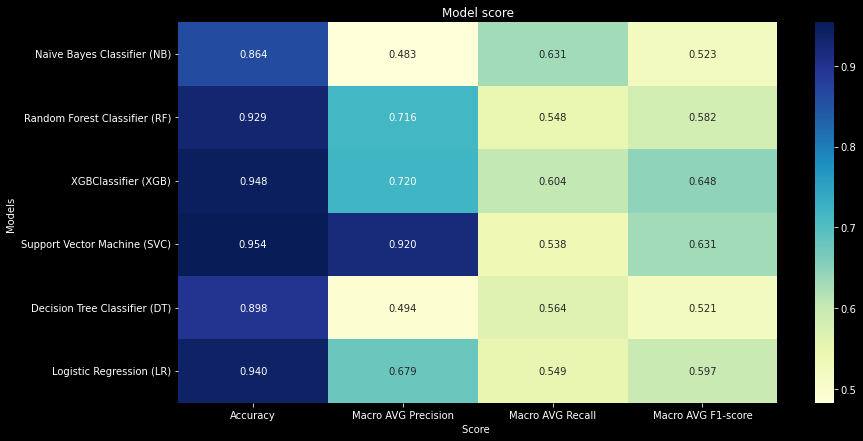

In [76]:
plot_result()

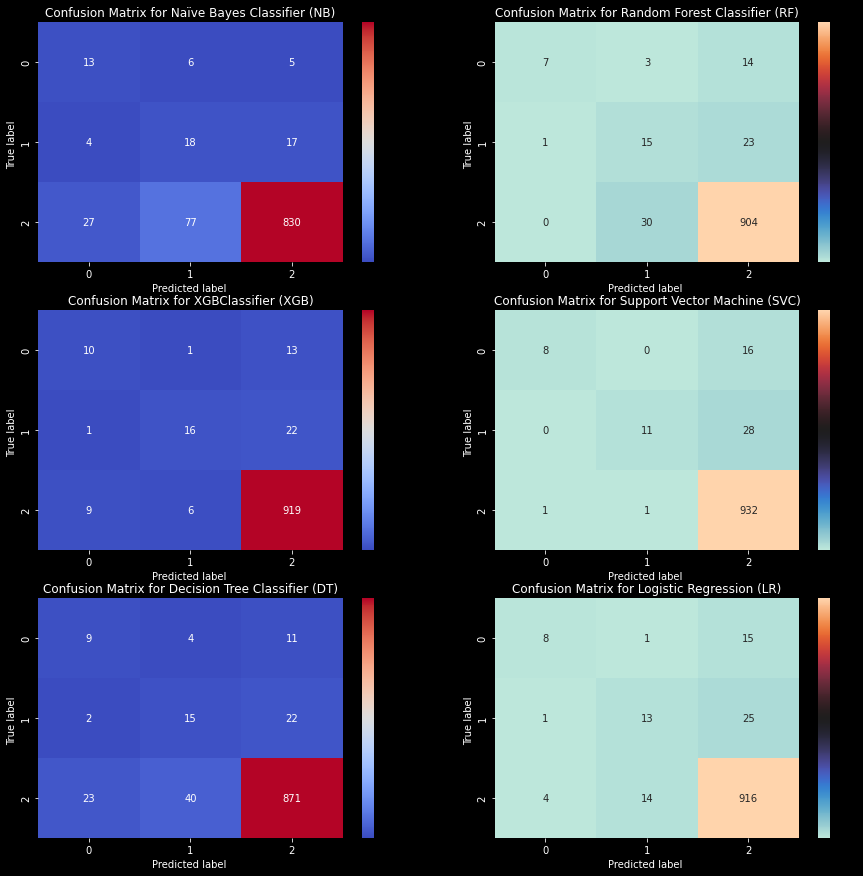

In [77]:
plot_matrix()

In [78]:
df_test['score']= [analyzer.polarity_scores(text)['compound'] for text in df_test['updated_text']]
X_test['score'] = [analyzer.polarity_scores(text)['compound'] for text in X_test['updated_text']]
df_test[df_test['sentiment'] == 0].sample(10)

C:\Users\عبدالعزيز\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,sentiment,aug_text,updated_text,score
5492,in this area is just a little regular fire tab...,0,"[area, little, regular, fire, tablet, ha, prot...",area little regular fire tablet ha protective ...,0.0717
5207,perhaps she could really perform some tasks la...,0,"[perhaps, could, really, perform, task, later,...",perhaps could really perform task later involv...,0.0000
5561,she could sometimes perform some tasks but the...,0,"[could, sometimes, perform, task, thing, know,...",could sometimes perform task thing know agriva...,0.0000
5832,hi i ordered this for my daughter who has an e...,0,"[hi, ordered, daughter, ha, extensive, liking,...",hi ordered daughter ha extensive liking tablet...,0.9641
5179,super slow although not of decent beta quality...,0,"[super, slow, although, decent, beta, quality,...",super slow although decent beta quality would ...,0.8519
5724,just okay product it was purchased for my form...,0,"[okay, product, wa, purchased, former, girlfri...",okay product wa purchased former girlfriend da...,-0.3851
5101,although my late first home tablet was a kindl...,0,"[although, late, first, home, tablet, wa, kind...",although late first home tablet wa kindle wa a...,-0.2023
5546,i have to say it never was a little too confus...,0,"[say, never, wa, little, confusing, frustratin...",say never wa little confusing frustrating wa g...,0.0586
5278,application purchased on this device already a...,0,"[application, purchased, device, already, laun...",application purchased device already launch pa...,-0.3412
2382,difficult to purchase no stock in stores no or...,0,"[difficult, purchase, stock, store, order, onl...",difficult purchase stock store order online sh...,-0.3612


In [79]:
X_train_transform_aug_score = hstack([X_train_transform_aug, df_test['score'].values.reshape(-1, 1)])
X_test_transform_score = hstack([X_test_transform_aug, X_test['score'].values.reshape(-1, 1)])

In [80]:
svc_params = {
    'class_weight': 'balanced'
}
dt_params = {
    'class_weight': 'balanced'
}
resutl = test( X_train_transform_aug_score, y_train_aug, X_test_transform_score, nb_test = False)


C:\Users\عبدالعزيز\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


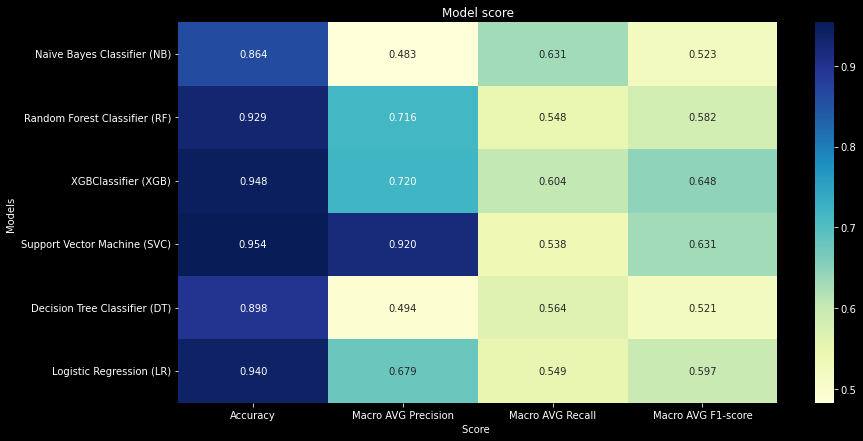

In [81]:
plot_result()

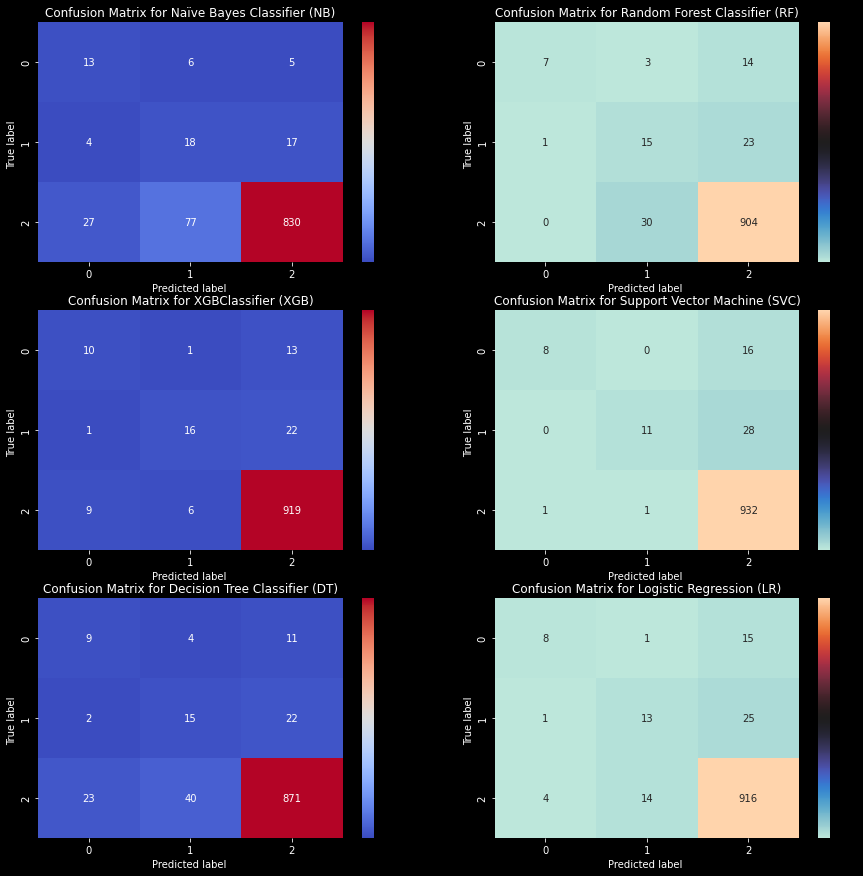

In [82]:
plot_matrix()

- Apply under sampling after text aug

In [83]:
undersample = NearMiss()
X_train_transform_near_miss, y_train_near_miss = undersample.fit_resample(X_train_transform_aug, y_train_aug)

X_train_transform_near_miss.shape,y_train_near_miss.shape

((3270, 4705), (3270,))

In [84]:
rf_params = {
    'max_depth':20,
     'n_estimators': 500,
     'class_weight': 'balanced'
}

nb_params = {
    'class_prior':[0.09,0.1,0.09]
}

dt_params = {
}

result = test(X_train_transform_near_miss, y_train_near_miss, X_test_transform_aug)


C:\Users\عبدالعزيز\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


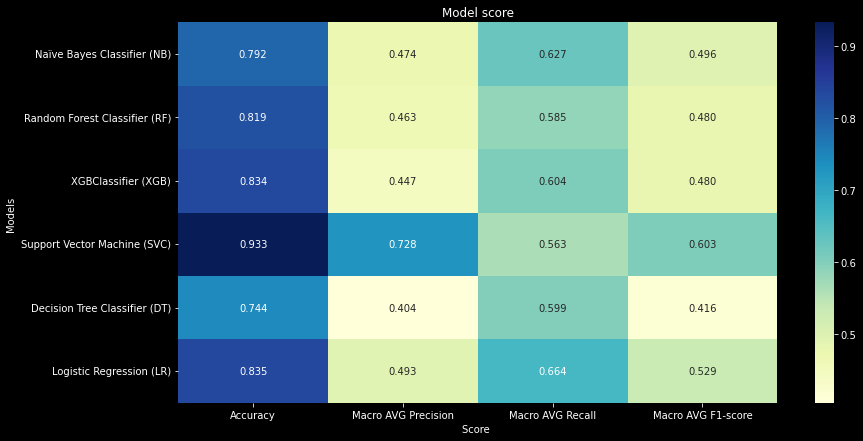

In [85]:
plot_result()

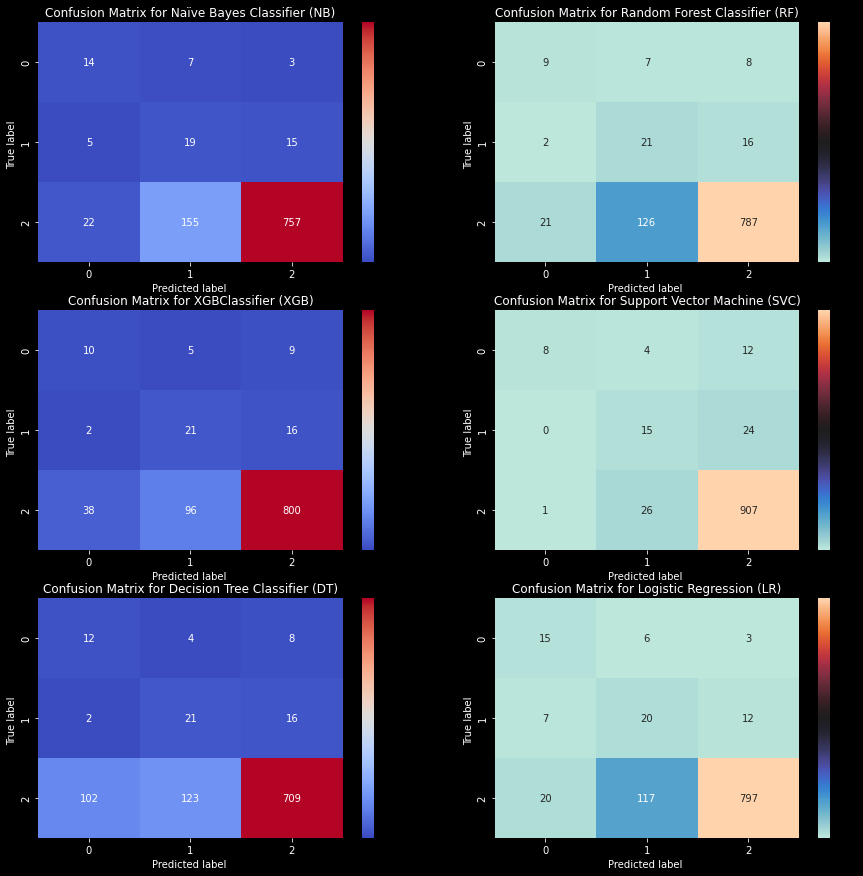

In [86]:
plot_matrix()

In [87]:
combinesample = SMOTETomek()
X_train_transform_smote_tomek, y_train_smote_tomek = combinesample.fit_resample(X_train_transform_aug, y_train_aug)

X_train_transform_smote_tomek.shape,y_train_smote_tomek.shape

((11082, 4705), (11082,))

In [88]:
nb_params = {
}

result = test(X_train_transform_smote_tomek, y_train_smote_tomek, X_test_transform_aug)

C:\Users\عبدالعزيز\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


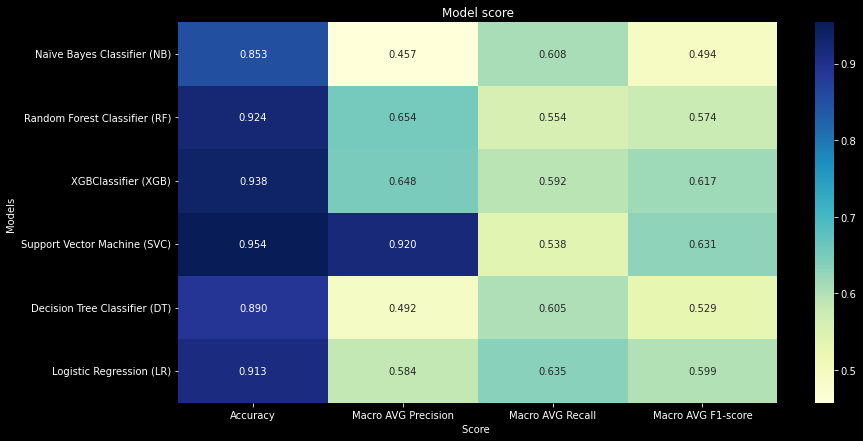

In [89]:
plot_result()

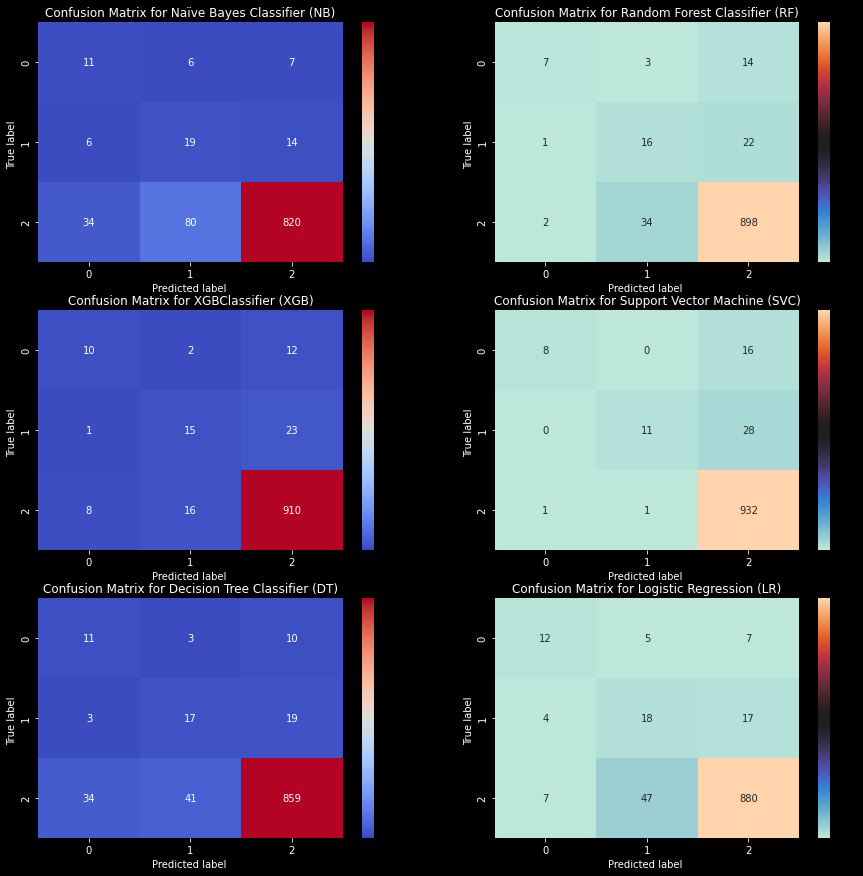

In [90]:
plot_matrix()

- LSTM and GRU

In [91]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
y_train.shape

(3942, 3)

In [92]:
voc_size=10000
dim = 90
onehot_train=[one_hot(words,voc_size) for words in X_train['updated_text']] 
print(onehot_train[:3])

sent_length=df_updated['review_length'].max()
embedded_docs=pad_sequences(onehot_train,padding='pre',maxlen=sent_length)
print(embedded_docs[:3])

onehot_test = [one_hot(words,voc_size) for words in X_test['updated_text']]
embedded_docs_test =pad_sequences(onehot_test,padding='pre',maxlen=sent_length)
print(embedded_docs[:3])

[[7513, 7547, 7408, 1771, 8486, 5752, 8532, 5398, 1136, 7241, 3058, 1886, 7071, 2905, 9935, 6282, 2800, 6282, 2322, 3097, 7418, 7059, 5833, 3793, 6251, 3305, 4733, 7198, 7557, 6282, 3737, 571, 3801, 541, 5833, 332, 2577, 2761, 1771, 7418, 404], [7513, 9769, 6282, 2429, 4729, 9769, 2067, 4729, 634, 7631, 1934, 2128, 8417, 706, 5390, 1490, 1775, 4126, 8213, 6665, 3981, 6515, 9655, 4775, 3280, 6515, 7238, 2177, 1400, 7584, 2073, 2868, 1018, 1756, 43, 3890, 9655, 5165, 1177, 9399, 1958, 6515, 5900, 8944, 3116, 4599, 7126, 8944, 1466, 3116, 1614, 9406, 8413, 6515, 5165, 2314, 6560, 5936, 388, 3737, 1098], [6607, 6515, 9287, 131, 330, 3188, 4667, 5630, 8189]]
[[   0    0    0 ... 1771 7418  404]
 [   0    0    0 ...  388 3737 1098]
 [   0    0    0 ... 4667 5630 8189]]
[[   0    0    0 ... 1771 7418  404]
 [   0    0    0 ...  388 3737 1098]
 [   0    0    0 ... 4667 5630 8189]]


In [95]:
def lstm_test():
  model = Sequential()
  model.add(Embedding(voc_size, dim, input_length= sent_length))
  model.add(LSTM(150))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(3,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.summary()
  return model

In [96]:
model = lstm_test()
X_train_final = np.array(embedded_docs)
X_test_final = np.array(embedded_docs_test)
history = model.fit(X_train_final, y_train, validation_data = (X_test_final, y_test) , epochs = 3 , batch_size = 64)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4758, 90)          900000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 150)               144600    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                9664      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 1,054,459
Trainable params: 1,054,459
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
62/62 [==============================] - 43s 542ms/step - loss: 0.3607 - accuracy: 0.9267 - val_loss: 0.2753 - val_accuracy: 0.9368
Epoch 2/3
62/62 [==============================] - 33s 533ms/step - loss: 0.2612 - accuracy: 0.9371 

In [97]:
def model_matrix():
    with plt.style.context('dark_background'):
        cm = confusion_matrix(y_test_result, y_pred)
        f = sns.heatmap(cm, annot=True, fmt='d')
        f.set_title("confusion_matrix" , color = "white")
        plt.xlabel("Predicted label " , color = "white")
        plt.ylabel("True label " , color = "white")
        plt.show()

def model_class_report(name):
    target_names = [str(i) for i in range(0,3)]
    class_report = pd.DataFrame(classification_report(y_test_result, y_pred, target_names=target_names, output_dict= True))
    with plt.style.context('dark_background'):
      plt.figure(figsize=(13.42,7))
      f = sns.heatmap(class_report.iloc[:-1, :].T, cmap='YlGnBu', annot=True, fmt='.3f')
      f.set_title('{} score'.format(name) , color = "white")
      plt.xlabel("Score " , color = "white")
      plt.ylabel("Models " , color = "white")

def model_accuracy_report():
    with plt.style.context('dark_background'):
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
def model_loss_report():
    with plt.style.context('dark_background'):
      plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
      plt.title('model loss')
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train', 'test'], loc='upper left')
      plt.show()



In [98]:
Y_pred = model.predict(X_test_final)
y_pred = np.argmax(Y_pred, axis=1)
y_test_result = np.argmax(y_test, axis=1)

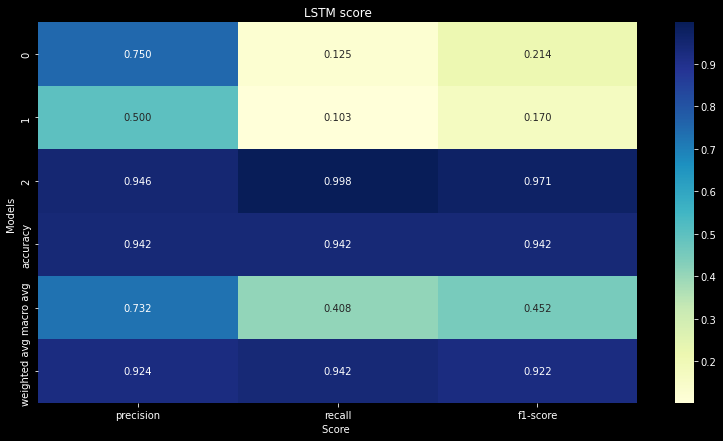

In [99]:
model_class_report('LSTM')

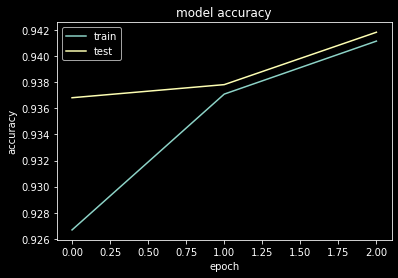

In [100]:
model_accuracy_report()

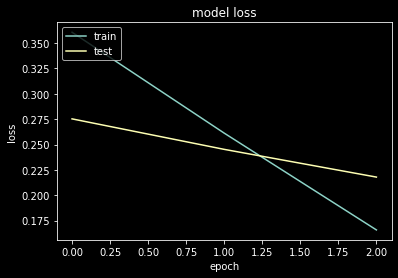

In [101]:
model_loss_report()

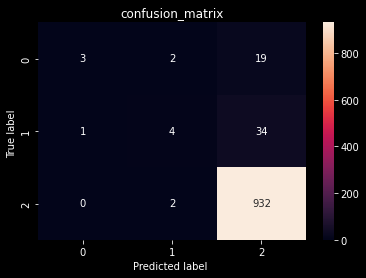

In [102]:
model_matrix()

In [103]:
def GRU_test():
  model = Sequential()
  model.add(Embedding(voc_size, dim, input_length= sent_length))
  model.add(GRU(150))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(3,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.summary()
  return model

In [104]:
model = GRU_test()
history = model.fit(X_train_final, y_train, validation_data = (X_test_final, y_test) , epochs = 3 , batch_size = 64)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 4758, 90)          900000    
_________________________________________________________________
gru (GRU)                    (None, 150)               108900    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                9664      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 1,018,759
Trainable params: 1,018,759
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
62/62 [==============================] - 37s 581ms/step - loss: 0.3902 - accuracy: 0.9221 - val_loss: 0.2447 - val_accuracy: 0.9368
Epoch 2/3
62/62 [==============================] - 36s 580ms/step - loss: 0.1984 - accuracy: 0.9386 

In [105]:
Y_pred = model.predict(X_test_final)
y_pred = np.argmax(Y_pred, axis=1)
y_test_result = np.argmax(y_test, axis=1)

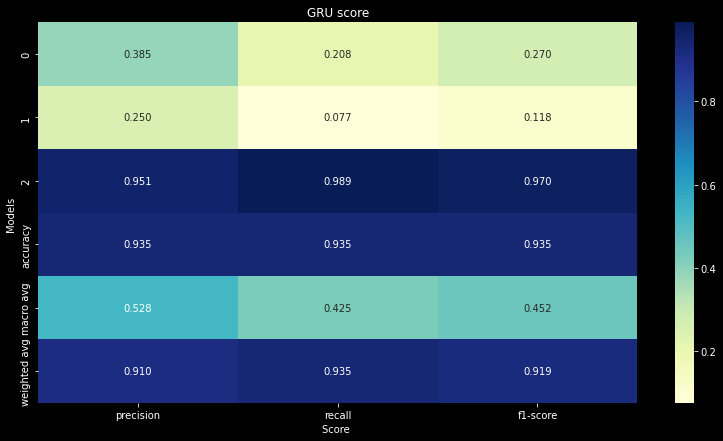

In [106]:
model_class_report('GRU')

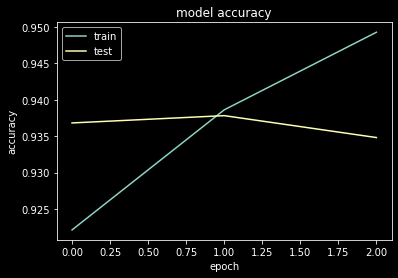

In [107]:
model_accuracy_report()

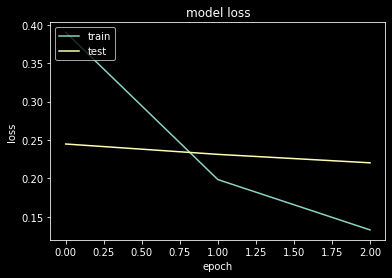

In [108]:
model_loss_report()

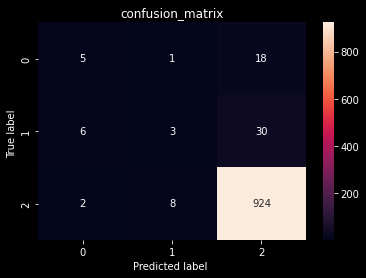

In [109]:
model_matrix()

In [110]:
y_train_aug = utils.to_categorical(y_train_aug)
y_train.shape

(3942, 3)

In [111]:
onehot_train=[one_hot(words,voc_size) for words in X_train_aug]

sent_length=df_updated['review_length'].max()
embedded_docs=pad_sequences(onehot_train,padding='pre',maxlen=sent_length)

onehot_test = [one_hot(words,voc_size) for words in X_test['updated_text']]
embedded_docs_test =pad_sequences(onehot_test,padding='pre',maxlen=sent_length)

In [112]:
X_train_final = np.array(embedded_docs)
X_test_final = np.array(embedded_docs_test)

In [113]:
model = lstm_test()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 4758, 90)          900000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 150)               144600    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                9664      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 1,054,459
Trainable params: 1,054,459
Non-trainable params: 0
_________________________________________________________________


In [114]:
history = model.fit(X_train_final, y_train_aug, validation_data = (X_test_final, y_test) , epochs = 3 , batch_size = 64)

Epoch 1/3
93/93 [==============================] - 51s 523ms/step - loss: 0.6662 - accuracy: 0.7137 - val_loss: 0.2445 - val_accuracy: 0.9157
Epoch 2/3
93/93 [==============================] - 50s 541ms/step - loss: 0.1964 - accuracy: 0.9283 - val_loss: 0.2827 - val_accuracy: 0.9117
Epoch 3/3
93/93 [==============================] - 53s 571ms/step - loss: 0.0604 - accuracy: 0.9815 - val_loss: 0.2767 - val_accuracy: 0.9298


In [115]:
Y_pred = model.predict(X_test_final)
y_pred = np.argmax(Y_pred, axis=1)
y_test_result = np.argmax(y_test, axis=1)

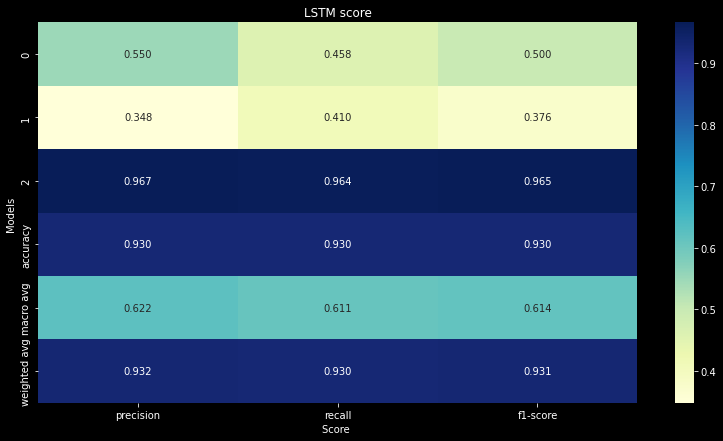

In [116]:
model_class_report('LSTM')

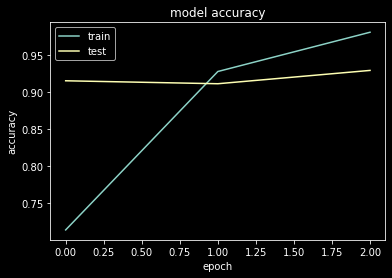

In [117]:
model_accuracy_report()

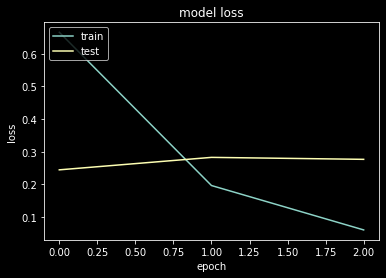

In [118]:
model_loss_report()

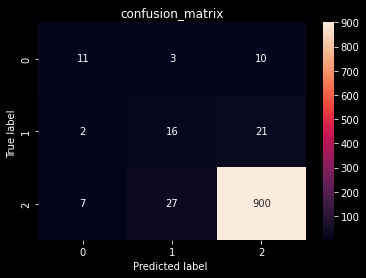

In [119]:
model_matrix()

In [120]:
model = GRU_test()
history = model.fit(X_train_final, y_train_aug, validation_data = (X_test_final, y_test) , epochs = 2 , batch_size = 64)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 4758, 90)          900000    
_________________________________________________________________
gru_1 (GRU)                  (None, 150)               108900    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                9664      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 195       
Total params: 1,018,759
Trainable params: 1,018,759
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
93/93 [==============================] - 57s 599ms/step - loss: 0.6039 - accuracy: 0.7492 - val_loss: 0.2358 - val_accuracy: 0.9147
Epoch 2/2
93/93 [==============================] - 59s 634ms/step - loss: 0.1197 - accuracy: 0.9562 

In [121]:
Y_pred = model.predict(X_test_final)
y_pred = np.argmax(Y_pred, axis=1)
y_test_result = np.argmax(y_test, axis=1)

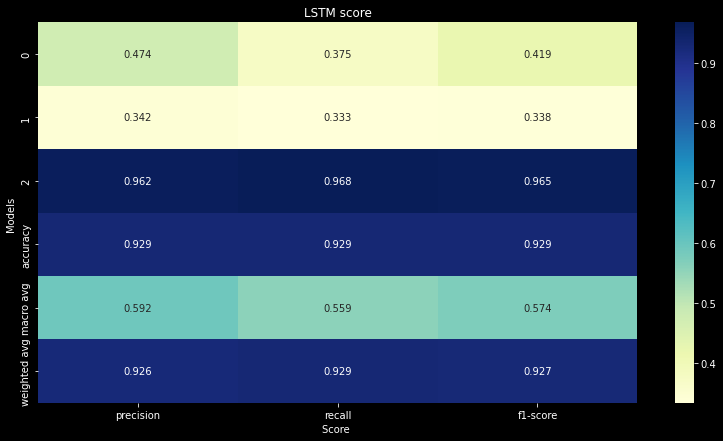

In [122]:
model_class_report('LSTM')

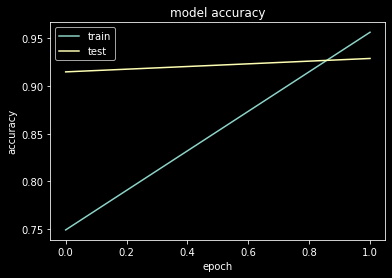

In [123]:
model_accuracy_report()

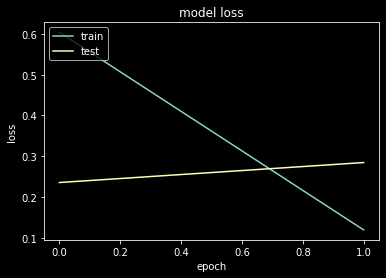

In [124]:
model_loss_report()

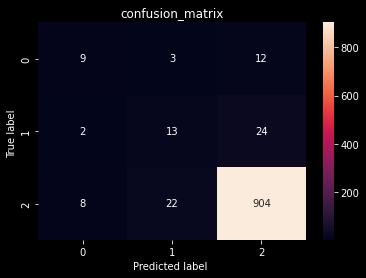

In [125]:
model_matrix()

- Topic Modeling

In [2]:
review_df1 = pd.read_csv('train_data.csv')
review_df2 =  pd.read_csv('test_data.csv')
review_df3 =  pd.read_csv('test_data_hidden.csv')
merge = pd.concat([review_df1,review_df2,review_df3])
reviews_df = merge[['reviews.text']].copy()
reviews_df.sample(10)

,reviews.text
3010,This tablet was an upgrade from the Nabi Jr fo...
2187,We bought one for my wife and my mother-in-law...
946,"I purchased two of these for my kids, ages 12 ..."
756,"For the price, you should be able to use as a ..."
2519,Great tablet for the price. Add to that expand...
333,This tablet is so great for school children to...
3240,I purchased the Amazon - Fire Kids Edition - 7...
1691,Purchased this for 6 year old boy and couldn't...
700,I like this smart machine and will recommend t...
3343,I love my Kindle black. I can read for hours w...


In [3]:
reviews_df['review_length'] = [len(review) for review in reviews_df['reviews.text']]
reviews_df.sample(10)

,reviews.text,review_length
636,Grandson is enjoying the new games on it. It's...,73
660,My granddaughter loves this system. It is easy...,98
3301,Does what it is advertise for and more. Had fu...,119
2705,This is great. The entire family is using it. ...,159
1155,I purchased this for my husbandHe had been wai...,107
1128,This little sorcerer's box displays magical pi...,78
901,Got this tablet for my mother and liked it so ...,122
1349,"Never owned a tablet before, but am loving it ...",53
2030,Not only does it round out my collection of Al...,193
3568,I have grown very accustomed to having Alexa a...,681


In [4]:
reviews_df[reviews_df.duplicated()].count()
reviews_df.drop_duplicates(inplace = True)
reviews_df.sample(10)

,reviews.text,review_length
3342,I've wanted a kindle for a while and decided t...,101
2055,Bought it for my wife she loves it and I would...,70
2611,This product was easy to set up and to use. Wo...,97
2651,Great price - great shipping - great item! Per...,88
240,When I tried to hook it up it wouldn't recogni...,172
2183,Easy and age appropriate. Can set timers for t...,137
880,Love this tablet. It does everything I need it...,280
1167,Really affordable present for a kid.. Or just ...,57
734,This was the first tablet we purchased for our...,64
1499,"Product is good, light. Amazing battery backup...",679


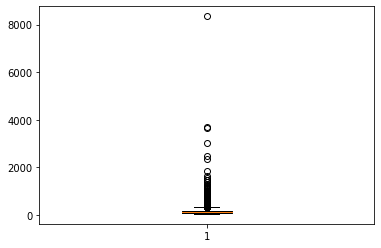

In [5]:
plt.boxplot(reviews_df.review_length)
plt.show()

In [6]:
reviews_df.columns= ['review' , 'review_length']
reviews_df.sample(10)

,review,review_length
408,The touch screen adds a new dimension to the E...,238
1203,I like the unit but battery seems to run down ...,112
788,"MY DAUTHER LOVES THIS TABLET, IS EXCELLENT FOR...",69
2812,I bought two of these for Christmas for my 3 a...,543
1984,Love this product easy to use and it does so m...,52
398,Very sturdy for little people who might drop i...,60
828,The show is our new best friend. We watch show...,136
1591,Worked as advertised - easy to set up and link...,59
3940,It has been a lot of fun using in our kitchen....,100
2523,This is a perfect upgrade to my kitchen Amazon...,771


In [8]:
reviews_df.review = reviews_df.review.apply(str.lower)
reviews_df.review = reviews_df.review.str.replace(r'[^a-zA-Z\s]', ' ',regex=True) 
reviews_df.review = reviews_df.review.str.replace(r'\s{2,}', ' ',regex=True)

In [9]:
reviews= reviews_df.review.to_list()
reviews[0],len(reviews)

('purchased on black fridaypros great price even off sale very powerful and fast with quad core processors amazing soundwell builtcons amazon ads amazon need this to subsidize the tablet and will remove the adds if you pay them inability to access other apps except the ones from amazon there is a way which i was able to accomplish to add the google play storenet this is a great tablet for the money',
 4385)

In [10]:
tweet_tokenizer = TweetTokenizer()
review_tokens = [tweet_tokenizer.tokenize(text) for text in reviews]
review_tokens[:2]
len(review_tokens)

4385

In [11]:
reviews_with_one_word = [i for i in review_tokens if len(i) == 1]

for i in reviews_with_one_word:
    review_tokens.remove(i)

In [12]:
review_pos  = [pos_tag(text) for text in review_tokens]
review_pos[:3]

[[('purchased', 'VBN'),
  ('on', 'IN'),
  ('black', 'JJ'),
  ('fridaypros', 'JJ'),
  ('great', 'JJ'),
  ('price', 'NN'),
  ('even', 'RB'),
  ('off', 'IN'),
  ('sale', 'NN'),
  ('very', 'RB'),
  ('powerful', 'JJ'),
  ('and', 'CC'),
  ('fast', 'JJ'),
  ('with', 'IN'),
  ('quad', 'NN'),
  ('core', 'NN'),
  ('processors', 'NNS'),
  ('amazing', 'VBG'),
  ('soundwell', 'NN'),
  ('builtcons', 'NNS'),
  ('amazon', 'VBP'),
  ('ads', 'NNS'),
  ('amazon', 'RB'),
  ('need', 'VBP'),
  ('this', 'DT'),
  ('to', 'TO'),
  ('subsidize', 'VB'),
  ('the', 'DT'),
  ('tablet', 'NN'),
  ('and', 'CC'),
  ('will', 'MD'),
  ('remove', 'VB'),
  ('the', 'DT'),
  ('adds', 'VBZ'),
  ('if', 'IN'),
  ('you', 'PRP'),
  ('pay', 'VBP'),
  ('them', 'PRP'),
  ('inability', 'NN'),
  ('to', 'TO'),
  ('access', 'NN'),
  ('other', 'JJ'),
  ('apps', 'NN'),
  ('except', 'IN'),
  ('the', 'DT'),
  ('ones', 'NNS'),
  ('from', 'IN'),
  ('amazon', 'NN'),
  ('there', 'EX'),
  ('is', 'VBZ'),
  ('a', 'DT'),
  ('way', 'NN'),
  ('which',

In [13]:
nouns = []
for text in review_pos:
    temp = []
    for noun in text:
        if re.match('N[NP].*', noun[1]):
            temp.append(noun)
    nouns.append(temp)
nouns[:3]

[[('price', 'NN'),
  ('sale', 'NN'),
  ('quad', 'NN'),
  ('core', 'NN'),
  ('processors', 'NNS'),
  ('soundwell', 'NN'),
  ('builtcons', 'NNS'),
  ('ads', 'NNS'),
  ('tablet', 'NN'),
  ('inability', 'NN'),
  ('access', 'NN'),
  ('apps', 'NN'),
  ('ones', 'NNS'),
  ('amazon', 'NN'),
  ('way', 'NN'),
  ('i', 'NN'),
  ('google', 'NN'),
  ('play', 'NN'),
  ('storenet', 'NN'),
  ('tablet', 'NN'),
  ('money', 'NN')],
 [('i', 'NNS'),
  ('amazon', 'NN'),
  ('dots', 'NNS'),
  ('fire', 'NN'),
  ('sticks', 'NNS'),
  ('hub', 'NN'),
  ('hue', 'NN'),
  ('lamp', 'NN'),
  ('family', 'NN'),
  ('christmas', 'NN'),
  ('i', 'NN'),
  ('purchases', 'NNS'),
  ('routine', 'NN'),
  ('program', 'NN'),
  ('news', 'NN'),
  ('weather', 'NN'),
  ('music', 'NN'),
  ('horoscope', 'NN'),
  ('day', 'NN'),
  ('compliment', 'NN'),
  ('i', 'NN'),
  ('alexa', 'NN'),
  ('chili', 'NN'),
  ('recipe', 'NN'),
  ('i', 'NN'),
  ('chili', 'NN'),
  ('i', 'NN'),
  ('husband', 'NN'),
  ('alexa', 'NN'),
  ('business', 'NN'),
  ('dates

In [14]:
lem = WordNetLemmatizer()
root_tokens = []
for words in nouns:
    temp = []
    for token in words:
        temp.append(lem.lemmatize(token[0]))
    root_tokens.append(temp)

root_tokens[:3]

[['price',
  'sale',
  'quad',
  'core',
  'processor',
  'soundwell',
  'builtcons',
  'ad',
  'tablet',
  'inability',
  'access',
  'apps',
  'one',
  'amazon',
  'way',
  'i',
  'google',
  'play',
  'storenet',
  'tablet',
  'money'],
 ['i',
  'amazon',
  'dot',
  'fire',
  'stick',
  'hub',
  'hue',
  'lamp',
  'family',
  'christmas',
  'i',
  'purchase',
  'routine',
  'program',
  'news',
  'weather',
  'music',
  'horoscope',
  'day',
  'compliment',
  'i',
  'alexa',
  'chili',
  'recipe',
  'i',
  'chili',
  'i',
  'husband',
  'alexa',
  'business',
  'date',
  'reminder',
  'way'],
 ['option', 'thing', 'screen']]

In [15]:
stop_words = stopwords.words('english')
clean_data = []
for noun in nouns:
    temp =[]
    for token in noun:
        if token[0] not in stop_words and len(token[0]) >=4 and token[0].isalpha():
            temp.append(token[0])
    if len(temp) != 0:
        clean_data.append(temp)


In [16]:
id2word = gensim.corpora.Dictionary(clean_data)


corpus = [id2word.doc2bow(text) for text in clean_data]


corpus[:2]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 2)],
 [(1, 1),
  (17, 2),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1)]]

In [17]:
def calculate_topic_cv(topic_range):
  cv_score =[]
  topic_num = []
  for i in range(2,topic_range):
    topic_num.append(i)
    ldamodel = LdaModel(corpus = corpus, num_topics= i, id2word= id2word, passes= 10, random_state= 2)
    cv_score.append(CoherenceModel(model=ldamodel,texts=clean_data, dictionary=id2word , coherence='c_v').get_coherence())
    print('topic {i}: {cv}'.format(i = i, cv = cv_score[i-2]))
  return topic_num,cv_score

In [18]:
topic_num,cv_score = calculate_topic_cv(8)

topic 2: 0.46098026716617463
topic 3: 0.4708944024094386
topic 4: 0.4767619513321677
topic 5: 0.46999349507571325
topic 6: 0.45451908995456086
topic 7: 0.4470742902762419


In [19]:
topic_num,cv_score

([2, 3, 4, 5, 6, 7],
 [0.46098026716617463,
  0.4708944024094386,
  0.4767619513321677,
  0.46999349507571325,
  0.45451908995456086,
  0.4470742902762419])

In [20]:
num_of_topics = 4

lda = LdaModel(corpus = corpus, num_topics= num_of_topics, id2word= id2word, passes= 10, random_state=2)


print('LDA model')
for idx in range(num_of_topics):
    print('Topic #%s:'%idx , lda.print_topic(idx,12))


LDA model
Topic #0: 0.043*"alexa" + 0.037*"device" + 0.036*"music" + 0.024*"home" + 0.023*"things" + 0.023*"amazon" + 0.021*"sound" + 0.019*"house" + 0.018*"speaker" + 0.018*"lights" + 0.017*"echo" + 0.016*"family"
Topic #1: 0.054*"kindle" + 0.038*"books" + 0.026*"screen" + 0.021*"reader" + 0.020*"fire" + 0.018*"size" + 0.014*"battery" + 0.014*"case" + 0.013*"page" + 0.013*"paperwhite" + 0.012*"book" + 0.011*"model"
Topic #2: 0.055*"product" + 0.042*"echo" + 0.038*"show" + 0.019*"video" + 0.017*"music" + 0.016*"works" + 0.014*"screen" + 0.013*"amazon" + 0.010*"husband" + 0.010*"time" + 0.009*"family" + 0.009*"alarm"
Topic #3: 0.110*"tablet" + 0.038*"price" + 0.036*"kids" + 0.029*"games" + 0.028*"gift" + 0.027*"year" + 0.026*"fire" + 0.019*"apps" + 0.018*"daughter" + 0.015*"tablets" + 0.015*"amazon" + 0.015*"time"


In [21]:
coherence_lda_model = CoherenceModel(model= lda,texts= clean_data, dictionary= id2word, coherence = 'c_v')


print('coherence score: ', coherence_lda_model.get_coherence())


coherence score:  0.4767619513321677


In [22]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda, corpus, id2word)

pyLDAvis.save_html(vis, 'lda4.html')
vis

D:\visualstudio\shared\Python37_64\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.157519  0.208551       1        1  35.151454
0      0.191012 -0.046794       2        1  23.970719
2      0.161265  0.028890       3        1  20.475219
1     -0.194757 -0.190647       4        1  20.402608, topic_info=        Term         Freq        Total Category  logprob  loglift
16    tablet  1007.000000  1007.000000  Default  30.0000  30.0000
88    kindle   289.000000   289.000000  Default  29.0000  29.0000
41   product   394.000000   394.000000  Default  28.0000  28.0000
17     alexa   267.000000   267.000000  Default  27.0000  27.0000
54      kids   331.000000   331.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
134    thing    44.836538   143.532618   Topic4  -4.7747   0.4260
83      fact    24.524697    30.289196   Topic4  -5.3781   1.3784
1     amazon    38.385904   391.551198   Topic4  -4.9301  -0.7329
114   device    36.486554   306.023386   Topic4  -4.9808  -0.5372
10     price    35.682854   385.091007   Topic4  -5.0031  -0.7893

[249 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
486       2  0.320671  addition
486       3  0.668064  addition
407       1  0.977967      ages
228       2  0.040582     alarm
228       3  0.933377     alarm
...     ...       ...       ...
61        1  0.928526      year
61        2  0.068498      year
270       1  0.015759     years
270       3  0.315177     years
270       4  0.677630     years

[326 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

In [23]:
lda_topics= lda.show_topics(formatted=False)

topics_only = []
for topic in lda_topics:
    temp_str  = ''
    for sub_topic in topic[1]:
        temp.append(sub_topic[0])
        temp_str += sub_topic[0] + ', '
    topics_only.append([topic[0] ,temp_str])

topics_only

[[0,
  'alexa, device, music, home, things, amazon, sound, house, speaker, lights, '],
 [1,
  'kindle, books, screen, reader, fire, size, battery, case, page, paperwhite, '],
 [2,
  'product, echo, show, video, music, works, screen, amazon, husband, time, '],
 [3,
  'tablet, price, kids, games, gift, year, fire, apps, daughter, tablets, ']]

In [25]:

topics_df = pd.DataFrame(topics_only, columns = ['Topic Number','Topic top words'])
topics_df['Topic name'] = ['alexa', 'kindle', 'sound quality of a product maybe alexa','tablet or ipad presented as a gift']

In [26]:
final_review = pd.DataFrame([', '.join(sent) for sent in clean_data], columns = ['Review keywords'])

In [28]:
topic_number = []
for sent in lda[corpus]:
  temp = []
  other = []
  for topic_num in sent:
    if topic_num[1] >= 0.35:
      temp.append(topic_num[0])
  if(len(temp) >= 1):
    topic_number.append(temp)
  else:
    topic_number.append([max(sent,key=itemgetter(1))[0]])

In [29]:
final_review['Topic Number'] = [', '.join(map(str,number)) for number in topic_number]
final_review.sample(10)

,Review keywords,Topic Number
3144,"devices, drop, video, chat, feature",2
3618,"daughter, tablet, mickey, clubhouse","0, 3"
972,"kids, case, daughter, thing, sound, louder","2, 3"
1023,"couple, gifts, cute, voice, room",1
3308,"sound, google, home, echo",0
74,"home, help, room",0
1612,"purchase, girlfriend",2
570,"child, tablet, rate, child, rides, days, cost,...","1, 3"
2076,"technology, everyone, life",2
1438,"purpose, child, games, appropriate, user, pare...",3


In [30]:
topic_names = []
for topic_num in topic_number:
    temp = []
    for i in topic_num:
        temp.append(topics_df.iloc[i]['Topic name'])
    topic_names.append(', '.join(temp))
final_review['Topic name'] = topic_names

final_review.sample(10)


,Review keywords,Topic Number,Topic name
109,"tablets, wonders, needs, tablet, browsing, gam...",3,tablet or ipad presented as a gift
2768,"tablet, ones, feature, everything, kind, apps",3,tablet or ipad presented as a gift
3283,"blocks, nothing, amazon, block, kindle",1,kindle
68,"tablet, good, games, netflix",3,tablet or ipad presented as a gift
518,"bluetooth, speakers, quality, questions",0,alexa
3094,"reading, kindles, light, light, size, wise, pa...",1,kindle
2613,"product, picture, voice, control","0, 2","alexa, sound quality of a product maybe alexa"
863,"games, jeopardy, family, edition, kids, jokes","0, 3","alexa, tablet or ipad presented as a gift"
673,"tablets, youtube, reading",3,tablet or ipad presented as a gift
1636,"accessory, alexis, system",3,tablet or ipad presented as a gift


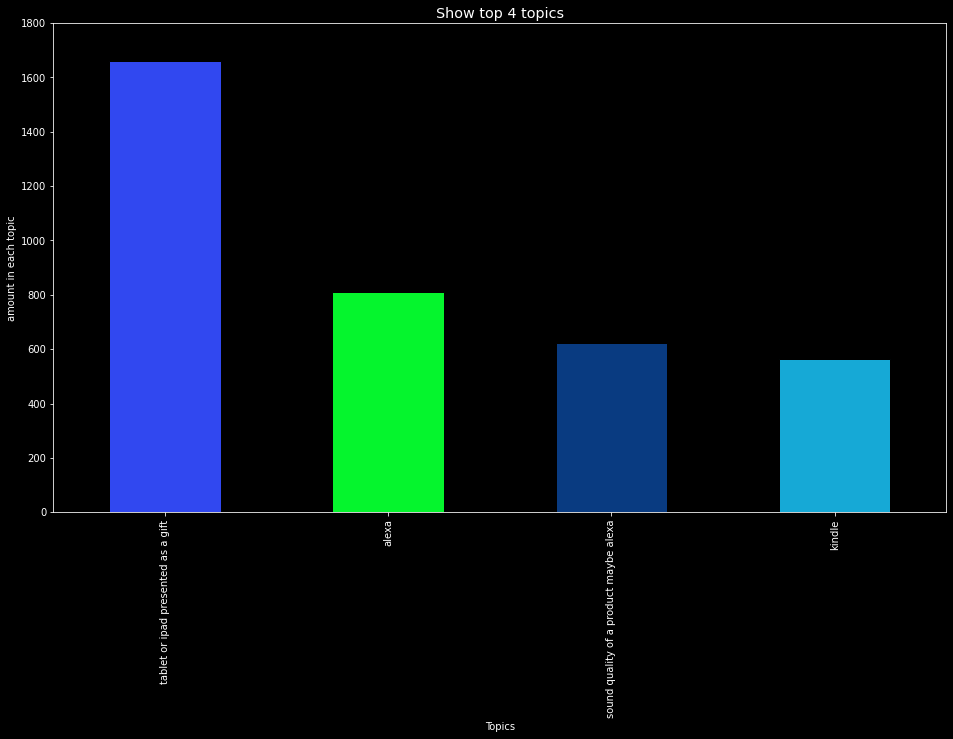

In [31]:
colors=['#3148F0','#05F52D',
        '#093B81', '#16A9D6', 
        '#16A9D6', '#DAC83C', '#DAC83C', '#EF4B9D', '#EF4B9D', '#D72E5B', '#D72E5B']
        
final_review['Topic name'].value_counts()[:4]

with plt.style.context('dark_background'):
    plt.grid(color='w', linestyle='solid') 
    plt.ticklabel_format(useOffset = False,style='plain')
    plt.style.use('classic')
    final_review['Topic name'].value_counts()[:4].plot(
        kind ='bar',figsize=(16,9), xlabel= 'Topics',
        ylabel= 'amount in each topic', color= colors,title='Show top 4 topics')
    plt.show()